# Desafio 1 - Grupo 2 

### INTEGRANTES:
### -Thomas Gomez
### -Pedro Torredo
### -Pedro Roisman
### -Segundo Rodriguez Parodi








### Objetivos del trabajo practico:

#### -Efectuar una limpieza del dataset provisto. Particularmente, deberá diseñar estrategias para lidiar con los datos perdidos en ciertas variables.
#### -Realizar un análisis descriptivo de las principales variables.
#### -Crear nuevas columnas a partir de las características dadas que puedan tener valor predictivo.

## 1) poner a tono el dataset

<p style="color:#FF0000";> Muy bien la idea de arrancar detallando los integrandes del grupo y los objetivos del trabajo. Capaz se puede mejorar un poco la estética, está muy cargado de negritas y letras grandes, no se diferencia bien los títulos del cuerpo.<p>

  ### 1.1)  Vamos a importar el dataset y ver un poco los datos

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import re 

In [2]:
# ubicacion del dataset
data_location = 'Data/properatti.csv'

data = pd.read_csv(data_location)

#vemos el dataset como esta compuesto

data.head(3)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...


In [273]:
data.groupby(["property_type"])["surface_total_in_m2"].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,3601.0,122.297417,298.387636,0.0,61.0,90.0,141.0,14742.0
apartment,51085.0,96.605873,1602.658969,0.0,43.0,59.0,87.0,200000.0
house,24505.0,507.438686,2135.548562,0.0,180.0,278.0,475.0,154438.0
store,2701.0,494.512403,2261.117146,0.0,60.0,154.0,360.0,93000.0


(0.0, 3000.0)

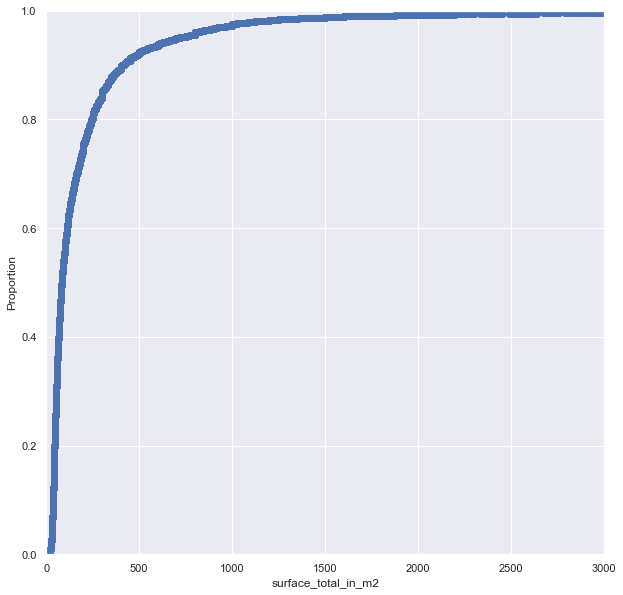

In [279]:
sns.ecdfplot(data["surface_total_in_m2"], marker="o")
plt.ylim([0,1])
plt.xlim([0,3000])

In [3]:
#vemos que cantidad de filas y columnas tiene el dataset

print ( "cantidad de filas ", data.shape[0])
print ( "cantidad de columnas ", data.shape[1])

cantidad de filas  121220
cantidad de columnas  26


In [4]:
# vemos que tipo de datos es cada columna

data.dtypes

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

### 1.2) vamos a seleccionar las columnas que nos interesan y borrar las filas duplicadas

- #### primeros valores eliminados (eliminados: 5.251)

In [5]:
#<p style="color:#FF0000";>  No habría que incluir las columnas de texto libre al momento de identificar duplicados ya que es muy dificil que los propietarios redacten 2 veces el mismo texto.

In [6]:
#vamos a limpiar las columnas q no usamos para luego identificar los duplicados

#creamos un nuevo dataset llamado data1 y seleccionamos las columnas que queremos

data1 = data[["property_type", "place_name", "place_with_parent_names", "state_name", "lat-lon", "price", "currency", "price_aprox_local_currency", "price_aprox_usd", "surface_total_in_m2", "surface_covered_in_m2", "price_usd_per_m2", "price_per_m2", "rooms", "description", "title"]]

print("antes teniamos ", data.shape[0], "filas y ", data.shape[1], "columnas")

#ahora vamos a identificar los duplicados
data1_duplicados = data1.duplicated()
print("cantidad de datos duplicados ", data1_duplicados.sum())
             
#ahora con drop duplicate vamos a eliminar los que son True y estan duplicados

data1 = data1.drop_duplicates()

print("ahora tenemos ", data1.shape[0], "filas y ", data1.shape[1], "columnas")

antes teniamos  121220 filas y  26 columnas
cantidad de datos duplicados  5251
ahora tenemos  115969 filas y  16 columnas


### 1.3) analizamos la cantidad de nulos que tiene el dataset

In [7]:
#ahora vamos a ver la cantidad de elementos nulos que tiene cada columna
data_nulos = data1.isnull()
cantidad_nulos = data_nulos.sum()
print("*cantidad de nulos*" , '\n')
print(cantidad_nulos, '\n')

#la idea es ver el % de nulos asi sabemos si las columnas sirven o no, o que trabajo tenemos que hacerle a cada una
cantidad_registros = data1.shape[0]
porcentaje_nulos = cantidad_nulos / cantidad_registros
print("*porcentaje de nulos*", '\n')
print(porcentaje_nulos)

*cantidad de nulos* 

property_type                     0
place_name                       23
place_with_parent_names           0
state_name                        0
lat-lon                       48214
price                         17435
currency                      17436
price_aprox_local_currency    17435
price_aprox_usd               17435
surface_total_in_m2           38375
surface_covered_in_m2         18801
price_usd_per_m2              49167
price_per_m2                  30314
rooms                         69899
description                       2
title                             0
dtype: int64 

*porcentaje de nulos* 

property_type                 0.000000
place_name                    0.000198
place_with_parent_names       0.000000
state_name                    0.000000
lat-lon                       0.415749
price                         0.150342
currency                      0.150351
price_aprox_local_currency    0.150342
price_aprox_usd               0.150342
surface_tota

### 1.4) vamos a investigar un poco ciertas columnas que nos interesan y limpiar si vemos algunos datos que no nos aportan

- #### Investigamos la columna price_aprox_usd

In [8]:
print('Tamaño columna price --->', data1['price_aprox_usd'].shape[0], '\n')
print('Valores nulos columna price --->', data1['price_aprox_usd'].isnull().sum(), '\n')
print('Valores NO nulos columna price --->', data1['price_aprox_usd'].notnull().sum(), '\n')
print(data1['price_aprox_usd'].describe())

Tamaño columna price ---> 115969 

Valores nulos columna price ---> 17435 

Valores NO nulos columna price ---> 98534 

count    9.853400e+04
mean     2.408766e+05
std      3.936819e+05
min      0.000000e+00
25%      9.000000e+04
50%      1.450000e+05
75%      2.680000e+05
max      4.654544e+07
Name: price_aprox_usd, dtype: float64


- #### Investigamos la columna property_type

In [9]:
data1['property_type'].value_counts()

apartment    66519
house        39761
PH            5618
store         4071
Name: property_type, dtype: int64

- #### de las 17.435 propiedades nulas, vamos a analizar que tipo de propiedad son para entender mejor 

In [10]:
# vamos a analizar cada tipo de propiedad

price_aprox_usd = data1['price_aprox_usd']
property_type_PH = data1['property_type'] == 'PH' 
PH_price = data1.loc[property_type_PH, 'price_aprox_usd']

property_type_apartment = data1['property_type'] == 'apartment' 
apartment_price = data1.loc[property_type_apartment, 'price_aprox_usd']

property_type_house = data1['property_type'] == 'house' 
house_price = data1.loc[property_type_house, 'price_aprox_usd']

property_type_store = data1['property_type'] == 'store' 
store_price = data1.loc[property_type_store, 'price_aprox_usd']

In [11]:
#ahora imprimos la cantidad de nulos para cada tipo de propiedad 

print('Cantidad de nulos en PH --->', PH_price.isnull().sum(), '\n')
print('Cantidad de nulos en apartment --->', apartment_price.isnull().sum(), '\n')
print('Cantidad de nulos en house --->', house_price.isnull().sum(), '\n')
print('Cantidad de nulos en store --->', store_price.isnull().sum(), '\n')

Cantidad de nulos en PH ---> 453 

Cantidad de nulos en apartment ---> 8844 

Cantidad de nulos en house ---> 7285 

Cantidad de nulos en store ---> 853 



In [12]:
#ahora vemos que % de nulos tiene cada tipo de propiedad 

print('Cantidad de nulos en PH --->', PH_price.isnull().sum() / PH_price.shape[0] , '\n')
print('Cantidad de nulos en apartment --->', apartment_price.isnull().sum() / apartment_price.shape[0] , '\n')
print('Cantidad de nulos en house --->', house_price.isnull().sum() / house_price.shape[0] , '\n')
print('Cantidad de nulos en store --->', store_price.isnull().sum() / store_price.shape[0] , '\n')

Cantidad de nulos en PH ---> 0.08063367746529014 

Cantidad de nulos en apartment ---> 0.13295449420466332 

Cantidad de nulos en house ---> 0.18321973793415658 

Cantidad de nulos en store ---> 0.20953082780643575 



- #### vamos a separar en bins para ver como se agrupan por precio todas las propiedades

In [13]:
#con qcut separamos en 4 bins de misma cantidad de datos, dejando afeura los nulos

priceusd_categorias = pd.qcut(data1['price_aprox_usd'], 4)
priceusd_categorias.value_counts()

(-0.001, 90000.0]         25515
(268000.0, 46545445.0]    24633
(145000.0, 268000.0]      24450
(90000.0, 145000.0]       23936
Name: price_aprox_usd, dtype: int64

In [14]:
# vemos los valores menores a 1000 usd y cuantos son

priceusd_menor_1000 = data1['price_aprox_usd'] < 1000
priceusd_menor_1000.value_counts()

False    115968
True          1
Name: price_aprox_usd, dtype: int64

In [15]:
# buscamos ese dato menos a 1.000 usd para analizarlo

dato_menor = data1[priceusd_menor_1000]
dato_menor

,property_type,place_name,place_with_parent_names,state_name,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,title
9761,house,Córdoba,|Argentina|Córdoba|,Córdoba,"4.5458426,-75.67893099",0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,3.0,Casa en Venta de 2 dorm. en Armenia,SE VENDE CASA EN EL BARRIO EL LIMONAR


- #### segundos valores elimiandos (eliminados: 1)

In [16]:
#vamos a eliminar ese dato porque no nos aporta nada ya que no tiene ni precio ni superficie (tampoco esta la info en description)

data2 = data1.drop([9761], axis = 0)
data2.shape

#data2.head(3)

(115968, 16)

In [17]:
#vemos ahora los nuevos bins q se armaron 

priceusd_categorias = pd.qcut(data2['price_aprox_usd'], 4)
priceusd_categorias.value_counts()

(4666.619, 90000.0]       25514
(268000.0, 46545445.0]    24633
(145000.0, 268000.0]      24450
(90000.0, 145000.0]       23936
Name: price_aprox_usd, dtype: int64

In [18]:
#ahora analizamos los que son mayores a 7,99mm de usd

priceusd_mayor_8m = data2['price_aprox_usd'] > 7999999
priceusd_mayor_8m.value_counts()

False    115945
True         23
Name: price_aprox_usd, dtype: int64

In [19]:
datos_mayores = data2[priceusd_mayor_8m]
datos_mayores

,property_type,place_name,place_with_parent_names,state_name,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,title
525,house,Acassuso,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Bs.As. G.B.A. Zona Norte,NaN,11000000.0,USD,1.940895e+08,11000000.00,7500.0,1800.0,1466.666667,6111.111111,NaN,Total vista al rÃ­o. Sobre 7500 m2 de parque a...,"Casa 7500m² con Dependencias en Garay, Juan De..."
11349,house,Capital Federal,|Argentina|Capital Federal|,Capital Federal,NaN,8500000.0,USD,1.499782e+08,8500000.00,7832.0,4111.0,1085.291113,2067.623449,NaN,Sobre 7832m2 de lote existen 4111m2 cubiertas ...,Casa 7832m² con Dependencias en Don Bosco 3400...
24548,apartment,San Telmo,|Argentina|Capital Federal|San Telmo|,Capital Federal,"-34.6213421,-58.3741846",46545445.0,USD,8.212711e+08,46545445.00,200000.0,NaN,232.727225,NaN,3.0,dsdffhghvcvbcdfdfghdfhghkjhkhjklhjkfgvghfghnfg...,Departamento venta
34638,house,Olivos,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Bs.As. G.B.A. Zona Norte,NaN,14000000.0,USD,2.470230e+08,14000000.00,2079.0,NaN,6734.006734,NaN,NaN,Excelente zona. Cerca de la Quinat Presidencia...,"Casa 2079m² en Del Libertador, Av. 2200, Vicen..."
44684,apartment,Palermo Chico,|Argentina|Capital Federal|Palermo|Palermo Chico|,Capital Federal,"-34.5789246,-58.4013987",8000000.0,USD,1.411560e+08,8000000.00,410.0,410.0,19512.195122,19512.195122,5.0,CONTACTO: MARTIN PINUS 15- EXCELENTISIMA PROPI...,LE PARC ALCORTA - PISO MUY ALTO DE 410 M2 CON ...
44685,apartment,Palermo Chico,|Argentina|Capital Federal|Palermo|Palermo Chico|,Capital Federal,"-34.5789246,-58.4013987",8500000.0,USD,1.499782e+08,8500000.00,410.0,410.0,20731.707317,20731.707317,5.0,CONTACTO: MARTIN PINUS 15- EXCELENTISIMA PROPI...,LE PARC ALCORTA - PISO MUY ALTO DE 410 M2 CON ...
45689,house,Rosario,|Argentina|Santa Fe|Rosario|,Santa Fe,"-32.933983,-60.7319772",11111111.0,USD,1.960500e+08,11111111.00,304.0,149.0,36549.707237,74571.214765,NaN,CODIGO: 2062-670 ubicado en: URQUIZA 7900 - P...,VENTA CASA AL FRENTE. 3 DORMITORIOS. 2 BAÑOS. ...
49083,house,San Carlos de Bariloche,|Argentina|Río Negro|San Carlos de Bariloche|S...,Río Negro,NaN,15500000.0,USD,2.734898e+08,15500000.00,NaN,NaN,NaN,NaN,NaN,CODIGO: 1092-vta-angostura ubicado en: Villa L...,"CASTILLO DE 1500 MTS CON VISTA AL LAGO,CASA DE..."
55319,house,Acassuso,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Bs.As. G.B.A. Zona Norte,"-34.4722088,-58.4996791",9900000.0,USD,1.746806e+08,9900000.00,1000.0,1000.0,9900.000000,9900.000000,NaN,Casa importante en lote privilegiado con vista...,Casa importante en lote privilegiado con vista...
57907,house,San Isidro,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Bs.As. G.B.A. Zona Norte,"-34.4877803,-58.5557866",8500000.0,USD,1.499782e+08,8500000.00,NaN,4111.0,NaN,2067.623449,NaN,Sobre 7832m2 de lote existen 4111m2 cubiertas ...,DON BOSCO 3400


- #### tercer eliminacion de valores (eliminados: 8)

In [20]:
#vamos a borrar en base a lo que vimos los sigueintes indices porque no son propiedades reales, o son errores de carga

data3 = data2.drop([24548, 91468, 107390, 91479, 91289, 91428, 114131, 45689], axis = 0)

In [21]:
data3.shape

(115960, 16)

## 2)  Vamos a trabajar ahora sobre las localidades

# ahora vamos a trabajar sobre las columnas de ubicacion

- ### Tenemos 3 columnas de ubicacion "place_name"   "place_with_parent_names"  "state_name"

- ### place_name no se puede utilizar como columna de Localidad ya que hay datos mal cargados, por ejemplo ciertas filas con nombres de Barrios Privados

- ### Es por eso que trabajamos la columna "place_with_parent_names", la splitiamos y obtuvimos la localidad de la misma. Esa localidad va a ser la ubicacion mas especifica para todo el trabajo 

In [22]:
#vamos a arrancar por sacar el pais Argentina ya que todas las propiedades son en Argentina.
# creamo una regex para sacar los |Argentina del comienzo de "place_with_parent_names"
import re
patron_argentina = "\|Argentina\|"
patron_regex_arg = re.compile(patron_argentina)
data3["place_with_parent_names"] = data3["place_with_parent_names"].apply(lambda x: x if x is np.NaN else patron_regex_arg.sub("",x))

#### una vez que tenemos la regex de thomas con todos los valores de m2, agregamos los datos a las dos columnas covered y total y ya podemos dividir la columna precio aprox usd por la columna final de surface que usemos para el total de la superficie. de esta manera obtenemos el verdadero valor de price per m2 REAL

In [23]:
data3.loc[:, ["place_with_parent_names"]].head(10)

,place_with_parent_names
0,Capital Federal|Mataderos|
1,Bs.As. G.B.A. Zona Sur|La Plata|
2,Capital Federal|Mataderos|
3,Capital Federal|Liniers|
4,Buenos Aires Costa Atlántica|Mar del Plata|Cen...
5,Entre Ríos|Gualeguaychú|
6,Bs.As. G.B.A. Zona Norte|Vicente López|Munro|
7,Capital Federal|Belgrano|
8,Capital Federal|Belgrano|
9,Santa Fe|Rosario|


In [24]:
#Splitiamos ahora "place_with_parent_names" en 3 columnas distintas (provincia, localidad, info extra) y las agregamos al DF

data3[["Provincia","Localidad", "Info_extra"]] = data3["place_with_parent_names"].str.split("|",n=2, expand=True)
data3.loc[:,["Provincia","Localidad", "Info_extra"]]

,Provincia,Localidad,Info_extra
0,Capital Federal,Mataderos,
1,Bs.As. G.B.A. Zona Sur,La Plata,
2,Capital Federal,Mataderos,
3,Capital Federal,Liniers,
4,Buenos Aires Costa Atlántica,Mar del Plata,Centro|
...,...,...,...
121215,Capital Federal,Belgrano,
121216,Bs.As. G.B.A. Zona Norte,San Isidro,Beccar|
121217,Capital Federal,Villa Urquiza,
121218,Buenos Aires Costa Atlántica,Mar del Plata,Plaza Colón|


In [25]:
data3.head(5)

,property_type,place_name,place_with_parent_names,state_name,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,title,Provincia,Localidad,Info_extra
0,PH,Mataderos,Capital Federal|Mataderos|,Capital Federal,"-34.6618237,-58.5088387",62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,Capital Federal,Mataderos,
1,apartment,La Plata,Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,"-34.9038831,-57.9643295",150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,Bs.As. G.B.A. Zona Sur,La Plata,
2,apartment,Mataderos,Capital Federal|Mataderos|,Capital Federal,"-34.6522615,-58.5229825",72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,Capital Federal,Mataderos,
3,PH,Liniers,Capital Federal|Liniers|,Capital Federal,"-34.6477969,-58.5164244",95000.0,USD,1676227.5,95000.0,NaN,NaN,NaN,NaN,NaN,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,Capital Federal,Liniers,
4,apartment,Centro,Buenos Aires Costa Atlántica|Mar del Plata|Cen...,Buenos Aires Costa Atlántica,"-38.0026256,-57.5494468",64000.0,USD,1129248.0,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,Buenos Aires Costa Atlántica,Mar del Plata,Centro|


In [26]:
#Creamos un nuevo DF con las 3 columnas del df original y con las columnas spliteadas para comparar la info de todas las columnas.

chequeo_data_frame = data3.loc[:,["state_name", "place_name", "place_with_parent_names", "Provincia", "Localidad", "Info_extra"]]
chequeo_data_frame.shape

(115960, 6)

In [27]:
#Creamos una mascara para aquellas propiedades sin Localidad(columna Localidad en blanco) para ver si podemos completar la localidad con la info de las otras columnas.

mask_propiedades_sin_localidad = data3["Localidad"] == ""

#Para corroborar, creamos un DF con aquellas propiedades sin localidad y comparamos las columnas. 
prop_sin_localidad = chequeo_data_frame.loc[mask_propiedades_sin_localidad,:]
prop_sin_localidad

,state_name,place_name,place_with_parent_names,Provincia,Localidad,Info_extra
108,Capital Federal,Capital Federal,Capital Federal|,Capital Federal,,None
110,Capital Federal,Capital Federal,Capital Federal|,Capital Federal,,None
115,Capital Federal,Capital Federal,Capital Federal|,Capital Federal,,None
119,Capital Federal,Capital Federal,Capital Federal|,Capital Federal,,None
121,Capital Federal,Capital Federal,Capital Federal|,Capital Federal,,None
...,...,...,...,...,...,...
121200,Córdoba,Córdoba,Córdoba|,Córdoba,,None
121202,Córdoba,Córdoba,Córdoba|,Córdoba,,None
121203,Córdoba,Córdoba,Córdoba|,Córdoba,,None
121205,Córdoba,Córdoba,Córdoba|,Córdoba,,None


In [28]:
#Con estas igualdades chequeamos que las columnas tienen la misma info y que no podemos obtener info adicional para completar la localidad de ciertas propiedas.

#son un total de 4402 propiedades sin localidad.

print((prop_sin_localidad["place_name"] == prop_sin_localidad["Provincia"]).all())
print((prop_sin_localidad["state_name"] == prop_sin_localidad["Provincia"]).all())

True
True


In [29]:
#chequeamos si hay propiedades que al haber spliteado "place_with_parent_names" hayan quedado con misma Provincia y Localidad.

print((data3["Provincia"] != data3["Localidad"]).all())

mask_misma_prov_y_localidad = data3["Provincia"] == data3["Localidad"]

print(mask_misma_prov_y_localidad.value_counts())

data3.loc[mask_misma_prov_y_localidad, ["state_name", "place_name", "place_with_parent_names", "Provincia", "Localidad", "Info_extra"]]


#hay 7421 otras propiedades que tienen misma Provincia y Localidad, es decir que no cuentan con Localidad. 
#Total de 12633 propiedades que no cuentan con Localidad especifica, unicamente provincia.

False
False    108539
True       7421
dtype: int64


,state_name,place_name,place_with_parent_names,Provincia,Localidad,Info_extra
10,Córdoba,Córdoba,Córdoba|Córdoba|,Córdoba,Córdoba,
32,Córdoba,Córdoba,Córdoba|Córdoba|,Córdoba,Córdoba,
87,Córdoba,Córdoba,Córdoba|Córdoba|,Córdoba,Córdoba,
88,Córdoba,Córdoba,Córdoba|Córdoba|,Córdoba,Córdoba,
89,Córdoba,Córdoba,Córdoba|Córdoba|,Córdoba,Córdoba,
...,...,...,...,...,...,...
120690,Córdoba,Córdoba,Córdoba|Córdoba|,Córdoba,Córdoba,
120966,Córdoba,Córdoba,Córdoba|Córdoba|,Córdoba,Córdoba,
120971,Córdoba,Córdoba,Córdoba|Córdoba|,Córdoba,Córdoba,
120979,Córdoba,Córdoba,Córdoba|Córdoba|,Córdoba,Córdoba,


- ### obtuvimos 4.402 propiedades con la columna "localidad" vacia, y 7.421 que tienen en la columna "localidad" la provincia

In [30]:
#vamos a eliminar esos datos porque creemos fundamental para el analisis tener la localidad del la propiedad. empezamos por los 7.421 que tienen la povincia en la localidad

data3["surface_para_eliminar_prov"] = mask_misma_prov_y_localidad

data4 = data3.drop(data3[data3['surface_para_eliminar_prov']==True].index)

data4.shape

(108539, 20)

- #### vamos a borrar esas propiedades que no tienen localidad o la localidad es igual a la provincia

In [31]:
#ahora vamos a borrar los q estan vacios en localidad

data4["surface_para_eliminar_vacios"] = mask_propiedades_sin_localidad

data5 = data4.drop(data4[data4['surface_para_eliminar_vacios']==True].index)

data5.shape

(104137, 21)

In [32]:
# chequeamos que la columna "Localida" no tenga data vacia

mask_check_sin_localidad = data5["Localidad"] == ""
prop_mask_check_sin_localidad = data5.loc[mask_propiedades_sin_localidad,:]
print(prop_mask_check_sin_localidad.shape)

# chequeamos que la columna "Localida" no tenga igualdad con "Provincia" (tiene q darnos False)

mask_check_prov_y_localidad = data5["Provincia"] == data5["Localidad"]
print(mask_check_prov_y_localidad.value_counts())

(0, 21)
False    104137
dtype: int64


In [33]:
# chequeamos que localidad o provincian tengan nulos

print(data5.isnull().sum())

property_type                       0
place_name                         23
place_with_parent_names             0
state_name                          0
lat-lon                         41420
price                           14500
currency                        14500
price_aprox_local_currency      14500
price_aprox_usd                 14500
surface_total_in_m2             32197
surface_covered_in_m2           15235
price_usd_per_m2                41679
price_per_m2                    25076
rooms                           61792
description                         2
title                               0
Provincia                           0
Localidad                           0
Info_extra                          0
surface_para_eliminar_prov          0
surface_para_eliminar_vacios        0
dtype: int64


In [34]:
#nos quedaron varias columnas que creamos para limpar el dataset y ahora las vamos a borrar

data6 = data5.drop(["surface_para_eliminar_prov","surface_para_eliminar_vacios"], axis = 1)

In [35]:
data6.head()

,property_type,place_name,place_with_parent_names,state_name,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,title,Provincia,Localidad,Info_extra
0,PH,Mataderos,Capital Federal|Mataderos|,Capital Federal,"-34.6618237,-58.5088387",62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,Capital Federal,Mataderos,
1,apartment,La Plata,Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,"-34.9038831,-57.9643295",150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,Bs.As. G.B.A. Zona Sur,La Plata,
2,apartment,Mataderos,Capital Federal|Mataderos|,Capital Federal,"-34.6522615,-58.5229825",72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,Capital Federal,Mataderos,
3,PH,Liniers,Capital Federal|Liniers|,Capital Federal,"-34.6477969,-58.5164244",95000.0,USD,1676227.5,95000.0,NaN,NaN,NaN,NaN,NaN,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,Capital Federal,Liniers,
4,apartment,Centro,Buenos Aires Costa Atlántica|Mar del Plata|Cen...,Buenos Aires Costa Atlántica,"-38.0026256,-57.5494468",64000.0,USD,1129248.0,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,Buenos Aires Costa Atlántica,Mar del Plata,Centro|


In [36]:
# chequeamos las columnas que quedaron
print(data6.isnull().sum())

property_type                     0
place_name                       23
place_with_parent_names           0
state_name                        0
lat-lon                       41420
price                         14500
currency                      14500
price_aprox_local_currency    14500
price_aprox_usd               14500
surface_total_in_m2           32197
surface_covered_in_m2         15235
price_usd_per_m2              41679
price_per_m2                  25076
rooms                         61792
description                       2
title                             0
Provincia                         0
Localidad                         0
Info_extra                        0
dtype: int64


- ### ahora chequeamos si hay vacios en la columna provincia

In [37]:
# vemos si hay nulos en la columna "provincia" creando una mascara

mask_provincia_vacio = data6["Provincia"] == ""

prop_sin_provincia = data6.loc[mask_provincia_vacio,:]
print(prop_sin_provincia.shape)

(0, 19)


### finamente cosneguimos que todas las propiedades tengan una localidad

In [38]:
#cuantos datos tenemos ahora en data6?

print(data6.shape)
print(data6.isnull().sum())

(104137, 19)
property_type                     0
place_name                       23
place_with_parent_names           0
state_name                        0
lat-lon                       41420
price                         14500
currency                      14500
price_aprox_local_currency    14500
price_aprox_usd               14500
surface_total_in_m2           32197
surface_covered_in_m2         15235
price_usd_per_m2              41679
price_per_m2                  25076
rooms                         61792
description                       2
title                             0
Provincia                         0
Localidad                         0
Info_extra                        0
dtype: int64


### Analizamos aquellas localidades con pocas propiedades y las eliminamos del data set

In [39]:
#Analizamos cantidad de provincias y localidades
data6.loc[:,["Provincia","Localidad"]].describe()

,Provincia,Localidad
count,104137,104137
unique,27,528
top,Capital Federal,Tigre
freq,29645,8535


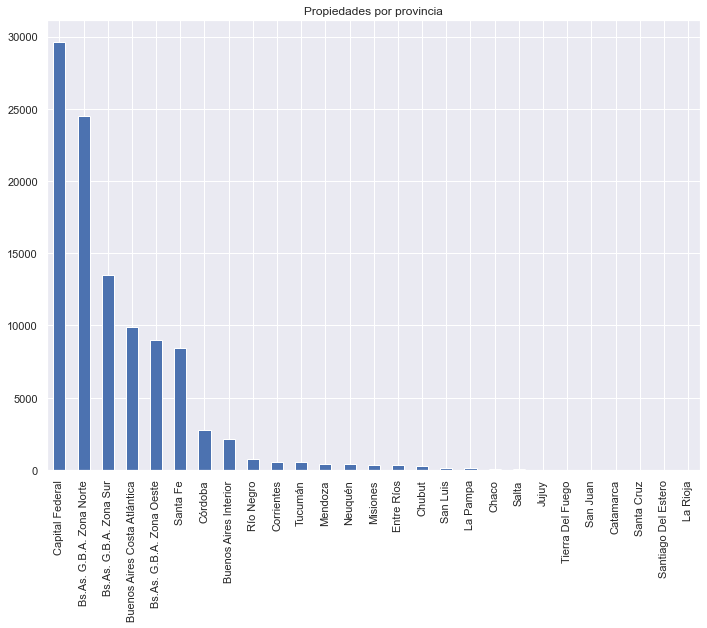

In [40]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plot = data6['Provincia'].value_counts().plot(kind='bar',
                                            title='Propiedades por provincia')

In [41]:
#En ciertas provincias contamos con muy pocas propiedades, con lo cual no nos sirven para el modelo.
data6["Provincia"].value_counts()

Capital Federal                 29645
Bs.As. G.B.A. Zona Norte        24528
Bs.As. G.B.A. Zona Sur          13531
Buenos Aires Costa Atlántica     9887
Bs.As. G.B.A. Zona Oeste         8970
Santa Fe                         8410
Córdoba                          2770
Buenos Aires Interior            2145
Río Negro                         784
Corrientes                        570
Tucumán                           560
Mendoza                           427
Neuquén                           426
Misiones                          362
Entre Ríos                        356
Chubut                            242
San Luis                          163
La Pampa                          150
Chaco                              56
Salta                              35
Jujuy                              25
Tierra Del Fuego                   25
San Juan                           24
Catamarca                          24
Santa Cruz                         20
Santiago Del Estero                 1
La Rioja    

In [42]:
#Creamos un data frame con localidades ordenadas por numero de propiedades
localidades = pd.value_counts(data6.Localidad).to_frame().reset_index()
localidades = localidades.rename(columns={"index":"localidad", "Localidad":"numero propiedades"})
localidades.head(5)

,localidad,numero propiedades
0,Tigre,8535
1,Mar del Plata,7634
2,Rosario,7388
3,Palermo,3885
4,Vicente López,3595


In [43]:
localidades.describe()

,numero propiedades
count,528.000000
mean,197.229167
std,755.195949
min,1.000000
25%,1.000000
50%,6.000000
75%,54.250000
max,8535.000000


In [44]:
#Creo una mascara para localidades con menos de 50 propiedades
mask_menores_100 = localidades["numero propiedades"] < 50
localidades_a_borrar = localidades[mask_menores_100]
localidades_a_borrar

,localidad,numero propiedades
135,Capitán Bermúdez,49
136,San Clemente del Tuyú,49
137,Villa General Mitre,48
138,Cañuelas,48
139,Santa Teresita,46
...,...,...
523,Laguna Larga,1
524,Sarmiento,1
525,Aluminé,1
526,Intendente Alvear,1


In [45]:
print("cantidad de propiedades: ", localidades["numero propiedades"].sum())
print("propiedades a borrar: ", localidades_a_borrar["numero propiedades"].sum())

cantidad de propiedades:  104137
propiedades a borrar:  3046


In [46]:
data6["Localidad"]

0             Mataderos
1              La Plata
2             Mataderos
3               Liniers
4         Mar del Plata
              ...      
121214       San Isidro
121215         Belgrano
121216       San Isidro
121217    Villa Urquiza
121218    Mar del Plata
Name: Localidad, Length: 104137, dtype: object

In [47]:
#Creo una lista con aquellas localidades a borrar
lista_localidades = list(localidades_a_borrar["localidad"])
lista_localidades

['Capitán Bermúdez',
 'San Clemente del Tuyú',
 'Villa General Mitre',
 'Cañuelas',
 'Santa Teresita',
 'Trenque Lauquen',
 'Luján de Cuyo',
 'Escalante',
 'Florencio Varela',
 'San Pedro',
 'Parque Chas',
 'Villa La Angostura',
 'Agronomía',
 'Velez Sarsfield',
 'Resistencia',
 'Villa Real',
 'Reconquista',
 'Río Ceballos',
 'Brandsen',
 'Granadero Baigorria',
 'San Miguel del Monte',
 'Unquillo',
 'Mar Azul',
 'Trelew',
 'Las Heras',
 'Concordia',
 'Necochea',
 'Cipolletti',
 'Maipú',
 'Campana',
 'Berisso',
 'Los Reartes',
 'Mar del Tuyú',
 'San Salvador de Jujuy',
 'Oncativo',
 'Mercedes',
 'Exaltación de la Cruz',
 'Ensenada',
 'Villa del Dique',
 'Tafí del Valle',
 'San Francisco',
 'Villa Constitución',
 'Río Tercero',
 'Iriondo',
 'Las Toninas',
 'Oberá',
 'Claromecó',
 'Alta Gracia',
 'Santa Clara del Mar',
 'Jesús María',
 'Azul',
 'Río Grande',
 'Mina Clavero',
 'Tanti',
 'Manantiales',
 'San Antonio de Arredondo',
 'Punta Indio',
 'Puerto Madryn',
 'La Granja',
 'Tafí Viejo

In [48]:
data6["Localidad"] = data6["Localidad"].apply(lambda x: np.NaN if x in lista_localidades else x)

In [49]:
data6["Localidad"].unique()

array(['Mataderos', 'La Plata', 'Liniers', 'Mar del Plata', nan,
       'Vicente López', 'Belgrano', 'Rosario', 'San Miguel', 'San Isidro',
       'Palermo', 'Tigre', 'General Rodríguez', 'Pilar', 'Morón',
       'Flores', 'Boedo', 'Las Cañitas', 'Villa Carlos Paz',
       'Puerto Madero', 'Balvanera', 'Escobar', 'Caballito', 'Nuñez',
       'Berazategui', 'General San Martín', 'Ituzaingó', 'Posadas',
       'Tres de Febrero', 'San Bernardo', 'San Telmo', 'Almagro',
       'San Fernando', 'Pinamar', 'Colón', 'Luján', 'San Lorenzo',
       'La Matanza', 'Lanús', 'Punilla', 'Villa Gesell',
       'Lomas de Zamora', 'Colegiales', 'Floresta', 'Quilmes',
       'Confluencia', 'General Roca', 'Barrio Norte', 'Barracas',
       'Villa Allende', 'Lobos', 'San Martín de los Andes', 'Recoleta',
       'Congreso', 'Villa Crespo', 'Chacarita', 'Constitución',
       'Villa Urquiza', 'Merlo', 'José C Paz', 'Saavedra', 'Monserrat',
       'Santo Tomé', 'Pompeya', 'Bahía Blanca', 'San Carlos de Baril

In [50]:
data6["Localidad"].isnull().sum()

3046

In [51]:
#eliminamos aquellas localidades con menos de 100 propiedads
data6.dropna(subset=["Localidad"],inplace=True)

In [52]:
#Chequeamos los nulos
data6["Localidad"].isnull().sum()

0

In [53]:
#cantidad de propiedades restantes
data6.shape

(101091, 19)

## 3)  La clave esta en la columna price per m2 en usd, por eso vamos a enfocarnos ahora en tener la mayor cantidad de datos posibles en esa columna

### 3.1) Arrancamos con la parte de Superficie
- #### vamos tratar de completar los valores que faltan entre las columnas surface total y surface covered

In [54]:
#analizamos superficie total por tipo de propiedad
data6.groupby("property_type")["surface_total_in_m2"].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,3149.0,121.738965,181.592703,0.0,64.0,95.0,149.0,9000.0
apartment,43486.0,81.049947,353.776281,0.0,42.0,59.0,88.0,49800.0
house,21392.0,453.230834,1106.730361,0.0,182.0,275.0,460.0,50000.0
store,2277.0,471.913043,2335.484440,0.0,58.0,150.0,357.0,93000.0


In [55]:
#analizamos superfice total por tipo de propiedad
data6.groupby("property_type")["surface_covered_in_m2"].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,4340.0,88.716359,146.534756,1.0,53.0,75.0,105.0,6610.0
apartment,51254.0,74.774320,865.312748,0.0,40.0,52.0,77.0,187000.0
house,28465.0,217.918496,411.000625,1.0,120.0,180.0,260.0,38240.0
store,2637.0,406.481608,1559.135146,1.0,40.0,114.0,299.0,35000.0


In [56]:
# vemos cantidad de nulos en cada columna
print("nulos en superficie total:", data6["surface_total_in_m2"].isnull().sum())
print("nulos en superficie cubierta:", data6["surface_covered_in_m2"].isnull().sum())

nulos en superficie total: 30787
nulos en superficie cubierta: 14395


In [57]:
# vemos cuantos valores tenemos en 0 para la columna surface total 

ceros_total_surface = data6['surface_total_in_m2'] == 0
print(ceros_total_surface.value_counts())

False    100735
True        356
Name: surface_total_in_m2, dtype: int64


In [58]:
# vemos cuantos valores tenemos en 0 para la columna surface covered 

ceros_covered_surface = data6['surface_covered_in_m2'] == 0
print(ceros_covered_surface.value_counts())

False    101089
True          2
Name: surface_covered_in_m2, dtype: int64


In [59]:
#cambiamos los valores .NaN por ceros que se suman a la lista de ceros ya existente

data6['total_en_zeros'] = data6['surface_total_in_m2'].fillna(0)
data6['covered_en_zeros'] = data6['surface_covered_in_m2'].fillna(0)

In [60]:
#vemos la cantidad de 0 que tienen ahora la columna total surface

ceros_total_mask = data6['total_en_zeros'] == 0
ceros_total_mask.value_counts()

ceros_total_print = data6[ceros_total_mask]
print('la cantidad de ceros que tiene la coluna surface_total es ',ceros_total_print.shape[0])

la cantidad de ceros que tiene la coluna surface_total es  31143


In [61]:
#vemos la cantidad de 0 que tienen ahora la columna covered surface

ceros_covered_mask = data6['covered_en_zeros'] == 0
ceros_covered_mask.value_counts()

ceros_covered_print = data6[ceros_covered_mask]
print('la cantidad de ceros que tiene la coluna surface_covered es ',ceros_covered_print.shape[0])

la cantidad de ceros que tiene la coluna surface_covered es  14397


In [62]:
#vamos a ver una description de cada columna 

print(data6["covered_en_zeros"].describe(), '\n')

print(data6["total_en_zeros"].describe(), '\n')


count    101091.000000
mean        113.684245
std         706.703790
min           0.000000
25%          36.000000
50%          63.000000
75%         132.000000
max      187000.000000
Name: covered_en_zeros, dtype: float64 

count    101091.000000
mean        145.195458
std         683.772251
min           0.000000
25%           0.000000
50%          53.000000
75%         133.000000
max       93000.000000
Name: total_en_zeros, dtype: float64 



- #### vamos a calcular los valores que tienen 0 en las dos columnas

In [63]:
mask_covered_ceros = data6["covered_en_zeros"] == 0
mask_total_ceros = data6["total_en_zeros"] == 0

mask_ambas_columnas_cero = data6[data6.covered_en_zeros.isin(mask_covered_ceros) &~ data6.total_en_zeros.isin(mask_total_ceros)]

mask_ambas_columnas_cero.shape

print('la cantidad de ceros en ambas columnas es ',mask_ambas_columnas_cero.shape[0])

la cantidad de ceros en ambas columnas es  5571


In [64]:
#correcion de cantidad de ceros en ambas columnas
mask_las_dos = mask_covered_ceros & mask_total_ceros
data6.loc[mask_las_dos, ["covered_en_zeros","total_en_zeros"]]

,covered_en_zeros,total_en_zeros
1,0.0,0.0
3,0.0,0.0
9,0.0,0.0
11,0.0,0.0
65,0.0,0.0
...,...,...
121070,0.0,0.0
121079,0.0,0.0
121086,0.0,0.0
121101,0.0,0.0


- #### esto equivale a que % de ceros en cada columna?

In [65]:
(mask_covered_ceros & mask_total_ceros).sum()/data6.shape[0]

0.08825711487669526

In [66]:
# para la columna covered es:

porcentaje_ambos_ceros_covered = mask_ambas_columnas_cero.shape[0]/ceros_covered_print.shape[0]
porcentaje_ambos_ceros_covered

0.3869556157532819

In [67]:
# para la columna total es:

porcentaje_ambos_ceros_total = mask_ambas_columnas_cero.shape[0]/ceros_total_print.shape[0]
porcentaje_ambos_ceros_total

0.17888450052981408

<p style="color:#FF0000";> Ojo que están mal las cuentas acá, el denominador debería ser el total del data set, no ese recorte
    
    mask_total_ceros.sum()/data6.shape[0]
    mask_covered_ceros.sum()/data6.shape[0]


- #### por lo que vimos, la columna covered esta mucho mas completa que la de total surface. Pero tenemos datos que esten en covered pero no en total? 

In [68]:
# vamos a caluclar los valores con un 1 q tienen valor en total pero no tienen valot en covered

covered_vs_total = data6.apply(lambda x : 1 if x['total_en_zeros']!= 0 and x['covered_en_zeros'] == 0 else 0, axis=1)
covered_vs_total.value_counts()

0    95616
1     5475
dtype: int64

##### *lo que estamos diciendo aca es que, de un total de 0s de 15.237 en la columna covered_surface, vamos a tener q imputar valores a 5.632 datos, osea que al final me tienen que quedar 9.605 datos con 0*

In [69]:
# vamos a caluclar los valores con un 1 q tienen valor covered pero no tienen valot en total

covered_vs_total_1 = data6.apply(lambda x : 1 if x['total_en_zeros']== 0 and x['covered_en_zeros'] != 0 else 0, axis=1)
covered_vs_total_1.value_counts()

0    78870
1    22221
dtype: int64

##### *lo que estamos diciendo aca es que, de un total de 0s de 32.555 en la columna total_surface, vamos a tener q imputar valores a 22.950 datos, osea que al final me tienen que quedar 9.605 datos con 0*

- #### ahora vamos a crear un ratio que me diga los m2 totales sobre m2 cubiertos para cada tipo de propiedad. Luego vamos a aplicar ese ratio a los valores que completemos 

In [70]:
#vemos los tipos de propiedad y la cantidad q tiene cada una

data6.property_type.value_counts(dropna = False)

apartment    58847
house        33689
PH            5120
store         3435
Name: property_type, dtype: int64

<p style="color:#FF0000";> Sacamos outliers antes de aplicar los ratios.<p>
 

In [71]:
#creamos nuevo dataset para hacer el cálculo de los ratios de tipo de propiedad
data_ratio = data
data_ratio.head(2)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.0,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...


In [72]:
#Creamos una funcion para eliminar outliers
def calculo_outliers_superficie(serie):
    q3 = serie.quantile(0.75)
    q1 = serie.quantile(0.25)
    iqr = q3 - q1 
    ls = q3 + iqr * 1.5
    li = q1 - iqr * 1.5
    outlier_mask = (serie < li) | (serie > ls)
    serie[outlier_mask] = np.NaN
    return serie

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,2933.0,102.480395,52.624704,0.0,61.0,90.0,131.0,271.0
apartment,39788.0,62.604454,28.636788,0.0,41.0,55.0,78.0,164.0
house,19843.0,333.045406,241.712760,0.0,179.0,259.0,400.0,1265.0
store,1954.0,169.739509,148.419719,0.0,50.0,120.0,250.0,696.0


In [ ]:
#### aplicamos la función para surface total y surface covered
data_ratio.groupby('property_type')['surface_total_in_m2'].apply(lambda x : calculo_outliers_superficie(x))
data_ratio.groupby('property_type')['surface_covered_in_m2'].apply(lambda x : calculo_outliers_superficie(x))

In [74]:
#Creamos función para hacer el promedio de total vs covered según el tipo de propiedad

def average_in(prop):
    property_type = data_ratio['property_type'] == prop
    average_type = data_ratio[property_type]
    average = average_type.apply(lambda x : np.nan if x['surface_total_in_m2'] == 0 or x['surface_covered_in_m2'] == 0 else x['surface_total_in_m2']/x['surface_covered_in_m2'], axis = 1)
    return average.mean()

ap = 'apartment'
ho = 'house'
ph = 'PH'
st = 'store'

ratio_ap = average_in(ap)
ratio_ho = average_in(ho)
ratio_ph = average_in(ph)
ratio_st = average_in(st)

print('Ratio Apartment:', ratio_ap)
print('Ratio House:', ratio_ho)
print('Ratio PH:', ratio_ph)
print('Ratio Store:', ratio_st)

Ratio Apartment: 1.44564000550622
Ratio House: 3.811037496054194
Ratio PH: 1.4858482403148943
Ratio Store: 1.6677401233906952


<p style="color:#FF0000";>  Antes de calcular estos ratios deberían limpiarse los outliers, así no afectan las métricas

- #### ya tenemos los ratios para cada tipo de propiedad y ahora podemos completar los valores de surface total con esos ratios cuando solo tengamos el valor de surface covered

In [75]:
# imputamos los APARTMENT con surface_total en cero y con dato en covered 

total_ap = data6.apply(lambda x : (x['covered_en_zeros']*ratio_ap) if x['total_en_zeros']== 0 and x['covered_en_zeros'] != 0 and x['property_type'] == ap else 0, axis=1)
apartment_total = total_ap + data6['total_en_zeros']

apartment_total.value_counts()
apartment_total.max()


270334.68102966313

In [76]:
# imputamos los APARTMENT con surface_covered en cero y con dato en total 


covered_ap = data6.apply(lambda x : (x['total_en_zeros']/ratio_ap) if x['covered_en_zeros']==0 and x['total_en_zeros'] != 0 and x['property_type'] == ap else 0, axis=1)
apartment_covered = covered_ap + data6['covered_en_zeros']
apartment_covered.value_counts()
apartment_covered.max()

187000.0

In [77]:
## imputamos los HOUSES con surface_total en cero y con dato en covered 

total_ho = data6.apply(lambda x : (x['covered_en_zeros']*ratio_ho) if x['total_en_zeros']==0 and x['covered_en_zeros'] != 0 and x['property_type'] == ho else 0, axis=1)
house_total = total_ho + data6['total_en_zeros']
house_total.value_counts()
house_total.max()

93000.0

In [78]:
# imputamos los HOUSES con surface_covered en cero y con dato en tot 


covered_ho = data6.apply(lambda x : (x['total_en_zeros']/ratio_ho) if x['covered_en_zeros']==0 and x['total_en_zeros'] != 0 and x['property_type'] == ho else 0, axis=1)
house_covered = covered_ho + data6['covered_en_zeros']
house_covered.value_counts()
house_covered.max()

187000.0

In [79]:
# imputamos los PH con surface_total en cero y con dato en covered 


total_ph = data6.apply(lambda x : (x['covered_en_zeros']*ratio_ph) if x['total_en_zeros']==0 and x['covered_en_zeros'] != 0 and x['property_type'] == ph else 0, axis=1)
ph_total = total_ph + data6['total_en_zeros']
ph_total.value_counts()
ph_total.max()

93000.0

In [80]:
# imputamos los PH con surface_covered en cero y con dato en total 


covered_ph = data6.apply(lambda x : (x['total_en_zeros']/ratio_ph) if x['covered_en_zeros']==0 and x['total_en_zeros'] != 0 and x['property_type'] == ph else 0, axis=1)
ph_covered = covered_ph + data6['covered_en_zeros']
ph_covered.value_counts()
ph_covered.max()

187000.0

In [81]:
# imputamos los STORES con surface_total en cero y con dato en covered 


total_st = data6.apply(lambda x : (x['covered_en_zeros']*ratio_st) if x['total_en_zeros']==0 and x['covered_en_zeros'] != 0 and x['property_type'] == st else 0, axis=1)
store_total = total_st + data6['total_en_zeros']
store_total.value_counts()
store_total.max()

93000.0

In [82]:
# imputamos los STORES con surface_covered en cero y con dato en total 


covered_st = data6.apply(lambda x : (x['total_en_zeros']/ratio_st) if x['covered_en_zeros']==0 and x['total_en_zeros'] != 0 and x['property_type'] == st else 0, axis=1)
store_covered = covered_st + data6['covered_en_zeros']
store_covered.value_counts()
store_covered.max()

187000.0

In [83]:
#creamos las columnas en el dataframe 

data6['covered_imputados'] = covered_st + covered_ph + covered_ho + covered_ap + data6['covered_en_zeros']
data6['total_imputados'] = total_st + total_ph + total_ho + total_ap + data6['total_en_zeros']

In [84]:
#vemos los valores en 0 para la columna covered

covered_zeros_final_1 = data6['covered_imputados'] == 0
covered_zeros_final_1.value_counts()

False    92169
True      8922
Name: covered_imputados, dtype: int64

In [85]:
#vemos los valores en 0 para la columna total

total_zeros_final_1 = data6['total_imputados'] == 0
total_zeros_final_1.value_counts()

False    92169
True      8922
Name: total_imputados, dtype: int64

##### *finalmente llegamos al valor q estabamos esperando de 9.605 datos con valor 0 en cada columna*

In [86]:
data6.groupby(['property_type'])['total_imputados'].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,5120.0,106.524237,152.355611,0.0,52.004688,90.0,140.00000,9000.000000
apartment,58847.0,86.561618,1166.450437,0.0,41.923560,60.0,91.07532,270334.681030
house,33689.0,486.959342,1201.694355,0.0,156.000000,300.0,600.00000,77680.377282
store,3435.0,412.072908,2064.322439,0.0,33.354802,105.0,300.00000,93000.000000


In [87]:
data6.groupby(['property_type'])['covered_imputados'].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,5120.0,78.989322,139.006320,0.0,42.0,68.000000,100.0,6610.0
apartment,58847.0,68.810547,820.590107,0.0,36.0,49.000000,74.0,187000.0
house,33689.0,188.812191,386.803439,0.0,90.0,160.000000,242.0,38240.0
store,3435.0,334.812355,1379.459317,0.0,25.0,86.344388,249.0,35000.0


In [ ]:
#Creamos una funcion para eliminar outliers
def calculo_outliers_superficie(serie):
    q3 = serie.quantile(0.75)
    q1 = serie.quantile(0.25)
    iqr = q3 - q1 
    ls = q3 + iqr * 1.5
    li = q1 - iqr * 1.5
    outlier_mask = (serie < li) | (serie > ls)
    serie[outlier_mask] = np.NaN
    return serie

In [264]:
#Creamos una nueva columna de superficie total SIN outliers
data6["total_imputados_sin_outliers"] = data6.groupby(['property_type',"Provincia"])['total_imputados'].apply(lambda x : calculo_outliers_superficie(x))
data6["covered_imputados_sin_outliers"] = data6.groupby(['property_type',"Provincia"])['covered_imputados'].apply(lambda x : calculo_outliers_superficie(x))

In [265]:
#Vemos claramente como afecta la quita de outliers
data6.groupby(['property_type'])['total_imputados_sin_outliers'].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,4802.0,90.116432,59.079744,0.0,50.000000,84.0,126.297100,264.000000
apartment,52774.0,59.684681,31.629287,0.0,40.000000,56.0,79.000000,163.357321
house,30327.0,338.528101,278.708963,0.0,140.000000,269.0,476.379687,1257.642374
store,2905.0,124.526176,130.439443,0.0,33.354802,73.0,195.000000,603.000000


In [267]:
data6["total_imputados"].max()

1265.2644486899924

(0.0, 50.0)

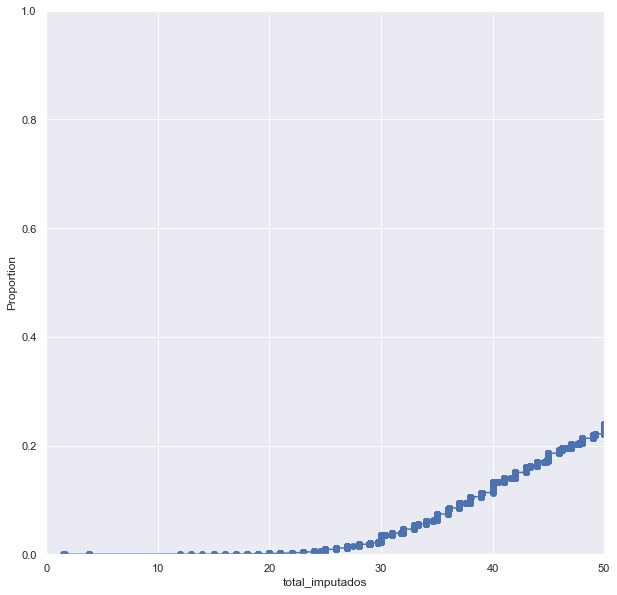

In [271]:
sns.ecdfplot(data11["total_imputados"], marker="o")
plt.ylim([0,1])
plt.xlim([0,50])

In [90]:
#Vemos claramente como afecta la quita de outliers
data6.groupby(['property_type'])['covered_imputados_sin_outliers'].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,4918.0,68.413444,42.921144,0.0,40.0,66.0,95.000000,187.0
apartment,55013.0,51.620277,27.724208,0.0,35.0,47.0,68.000000,131.0
house,32344.0,162.405363,109.417690,0.0,85.0,154.0,230.000000,470.0
store,3077.0,118.684126,131.367224,0.0,20.0,65.0,179.284527,583.0


## Analizamos Outliers que estan como NaN y valores en ceros de las columnas superficies cubiertas y total SIN Outliers

In [91]:
#Aquellas que tienen ceros en ambas columnas
cubierta_ceros = data6["covered_imputados_sin_outliers"] == 0
total_ceros = data6["total_imputados_sin_outliers"] == 0
mask_cero_ambas = cubierta_ceros & total_ceros

In [92]:
#Contamos con 8922 propiedas con ceros en ambas
data6.loc[mask_cero_ambas, ["covered_imputados_sin_outliers","total_imputados_sin_outliers"]]

,covered_imputados_sin_outliers,total_imputados_sin_outliers
1,0.0,0.0
3,0.0,0.0
9,0.0,0.0
11,0.0,0.0
65,0.0,0.0
...,...,...
121070,0.0,0.0
121079,0.0,0.0
121086,0.0,0.0
121101,0.0,0.0


In [93]:
#con cuantos outliers contamos en cada columna?
print("outliers en superfice cubierta:", data6["covered_imputados_sin_outliers"].isnull().sum())
print("outliers en superfice total:", data6["total_imputados_sin_outliers"].isnull().sum())

outliers en superfice cubierta: 5739
outliers en superfice total: 6550


In [94]:
#Chequamos la cantidad de propiedades que tenemos en el data set
data6.shape

(101091, 25)

In [95]:
#eliminamos outliers de superficie cubierta y superficie total
data6 = data6.dropna(subset = ["covered_imputados_sin_outliers","total_imputados_sin_outliers"])

In [96]:
data6.shape

(92892, 25)

In [97]:
data6.isnull().sum()

property_type                         0
place_name                           21
place_with_parent_names               0
state_name                            0
lat-lon                           37458
price                             12335
currency                          12335
price_aprox_local_currency        12335
price_aprox_usd                   12335
surface_total_in_m2               28374
surface_covered_in_m2             14107
price_usd_per_m2                  36462
price_per_m2                      22273
rooms                             55570
description                           2
title                                 0
Provincia                             0
Localidad                             0
Info_extra                            0
total_en_zeros                        0
covered_en_zeros                      0
covered_imputados                     0
total_imputados                       0
total_imputados_sin_outliers          0
covered_imputados_sin_outliers        0


## 3.2) Vamos a seguir completando datos de superficie pero vamos a ver si hay info en la columna "description"

In [98]:
import re

#### Lo que descubrimos es que los valores de price per m2 en usd es diferente que los de price per m2, porque uno toma la superficie total y el otro la superficie covered. Por eso debemos crear una sola columna de price per m2 en usd, unificando criterios. vamos a dividir la columna price aprox usd por los m2 totales. para eso tenemos q terminar de completar la columna surface total.  

In [99]:
# arrancamos creando una busqueda de la palabra metros y el valor que tiene previamente

patron_valor_metros = '(?P<valor_mts>\d{0,4} ?)(?P<metros>m2|mts|mt|mts2|mt2)'
patron_regex_metros = re.compile(patron_valor_metros, re.IGNORECASE)

valor_mts_match = data6["description"].apply(lambda x:x if x is np.NaN else patron_regex_metros.search(x).group("valor_mts") if patron_regex_metros.search(x)!=None else np.NaN)

data6['metros_description'] = valor_mts_match
data6['metros_description'].unique()

array([nan, '106 ', '40 ', ..., '697 ', '803 ', '1346 '], dtype=object)

In [100]:
data6["metros_description"].value_counts()

        1763
50       856
80       648
100      573
40       532
        ... 
2650       1
634        1
453        1
433        1
764        1
Name: metros_description, Length: 1740, dtype: int64

In [101]:
#ensanchamos la columna description para poder comparar los regex encontradas y la columna "description"
pd.set_option("display.max_colwidth",1000)

#Hay ciertos datos que el regex nos trae con espacio en blanco pero no pudimos econtrar el motivo.
mascara_espacios_blanco = data6["metros_description"] == ""
data6.loc[mascara_espacios_blanco,["metros_description","description"]].head()

,metros_description,description
214,,"Zona residencial consolidad; con oferta gastronómica, comercial, colegios, facultades, rápida salida a las autopistaCentro geográfico de CABAcocina integradacocina a gaspisos de porcelanatogriferia FVmuebles de cocina (alacena y bajo mesada)mesada de granitocortinas de enrollar en el dormitorio de aluminioplacard con puertas corredizas e interiores terminadoscalefacción por aire F/C instaladocerramientos de aluminiobalcónAgua caliente centralOrientacion Este, sol de mañanaespacio lavaderoAmenities:SUM ParrillaSolariumTransportes:Colectivos: 1, 2, 5, 8, 25, 26, 36, 44, 49, 53, 55, 76, 85, 86, 88, 96, 103, 104, 126, 132, 134, 136, 141, 163, 180Subtes (Metro): PUAN (Línea A)Trenes: CABALLITO (SARMIENTO)"
217,,"Zona residencial consolidad; con oferta gastronómica, comercial, colegios, facultades, rápida salida a las autopistaCentro geográfico de CABAcocina integradacocina a gaspisos de porcelanatogriferia FVmuebles de cocina (alacena y bajo mesada)mesada de granitocortinas de enrollar en el dormitorio de aluminioplacard con puertas corredizas e interiores terminadoscalefacción por aire F/C instaladocerramientos de aluminiobalcónAgua caliente centralOrientación Este, sol de mañanaespacio lavaderoAmenities:SUM ParrillaSolariumTransportes:Colectivos: 1, 2, 5, 8, 25, 26, 36, 44, 49, 53, 55, 76, 85, 86, 88, 96, 103, 104, 126, 132, 134, 136, 141, 163, 180Subtes (Metro): PUAN (Línea A)Trenes: CABALLITO (SARMIENTO)"
826,,"Venta de Casa 3 AMBIENTES en Boulogne, San Isidrocasa en planta baja 2 dormitorios baño completo living y cocina comedorlavadero quincho y parrilla patio con pileta plástica y solariumterraza - - DANIEL A. FIORITO PROPIEDADES"
983,,"Corredor Responsable: Marcelo Trujillo - CUCICBA 6470 / CMCPDJLM 810Contacto: Cristian Saladdino - MLS ID # 420261016-115Fecha de Entrega de todas las Unidades / Septiembre 2017 TOMAMOS a la Venta PROPIEDADES en parte de pago AQUAREL XIX - TERRERO 860- Terminaciones y Calidades Constructivas Pisos Porcellanato en ambientes baños y cocinas y Pisos con cerámicos Cerro Negro, San Lorenzo y/o similar en balcones Porcellanato en los Palieres y entrada del Edificio .- Cielorrasos : Aplicados de yeso Con bañas y armados en baños y sectores cocina Revoques : Yeso en interiores de los departamentos y palieres. En El resto de las partes comunes del Edificio fino a la ca. Terminaciones en el exterior del Edificio con salpicado plástico tipo Quimtex y/o similar .- Carpintería : Interiores Marcos de chapa doblado BMG 18 y hojas de Placa de madera mdf para pintar, herrajes tipo sanatorio pesado o similar Exteriores Marcos y Hojas de aluminio anodizado color natural tipo Modena o similar..."
984,,"Corredor Responsable: Marcelo Trujillo - CUCICBA 6470 / CMCPDJLM 810Contacto: Cristian Saladdino - MLS ID # 420261016-117Fecha de Entrega de todas las Unidades / SEPTIEMBRE2017 TOMAMOS a la Venta PROPIEDADES en parte de pago AQUAREL XIX - TERRERO 860- Terminaciones y Calidades Constructivas Pisos Porcellanato en ambientes baños y cocinas y Pisos con cerámicos Cerro Negro, San Lorenzo y/o similar en balcones Porcellanato en los Palieres y entrada del Edificio .- Cielorrasos : Aplicados de yeso Con bañas y armados en baños y sectores cocina Revoques : Yeso en interiores de los departamentos y palieres. En El resto de las partes comunes del Edificio fino a la ca. Terminaciones en el exterior del Edificio con salpicado plástico tipo Quimtex y/o similar .- Carpintería : Interiores Marcos de chapa doblado BMG 18 y hojas de Placa de madera mdf para pintar, herrajes tipo sanatorio pesado o similar Exteriores Marcos y Hojas de aluminio anodizado color natural tipo Modena o similar...."


In [102]:
#En muchos casos el patron es correcto, y en otros casos agarra los metros cuadrados de otro objeto que no es el terreno. Por una cuestion de tiempos lo dejamos asi.

metros_description_not_null = data6['metros_description'].notnull()
data6.loc[metros_description_not_null,["metros_description","description"]].head(10)

,metros_description,description
6,106,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENTE - SIN EXPENSAS! TODO EN PLANTA BAJA DOS DORMITORIOS (pisos de pinotea) - LIVING - COCINA COMEDOR - BAÑO - PATIO - GALPÓN Y LAVADERO EN EL PATIOEN MUY BUEN ESTADO - INMEJORABLE UBICACIÓN - A 1 CUADRA DE LA ESTACIÓN DE MUNRO - CERCA DE MAS DE 6 LINEAS DE COLECTIVOS - A 2 CUADRAS DEL CENTRO UNIVERSITARIO. 106 m2 TOTALES: 78 m2 CUBIERTOS Y 28 m2 DESCUBIERTOSAPTO PROFESIONAL Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).
18,40,"Casa sobre lote al golf en barrio San Isidro Labrador.Planta Baja:Amplio Living comedor en doble altura,Toilette,Cocina comedor, Family/Escritorio, Lavadero, dependencia de servicio, Galería cubierta y semi cubierta.Planta Alta:Master Suite con ducha escocesa e hidromasajes doble, tres dormitorios, Baño, Escritorio y Placar de Blanco.Todos los pisos son de porcelanato.Losa Radiante en todos los ambientes y galería.Piscina con espejo de agua de 40 m2."
22,1000,"Edificada en 2 plantas. PB. amplio living con salida al parque, cocina con salida a la galería, todos los ambientes de pb con pisos de porcelanato. Toilet de recepción, lavadero, galería con parrilla. Amplio jardín de 1000 m2.PA: 3 dormitorios con pisos de porcelanato, uno de los cuales es en suite con vestidor, 2 baños completos. Hermosa vista abierta desde toda la planta alta. Muy luminosa! hermoso hogar a leña en el living. Cálida y acogedora.calefaccion por radeadores.la casa se encuentra en construcción, entrega terminada y pintada. No incluye mobiliario de cocinaEl barrio cuenta con una completa infraestructura de servicios y propuestas deportivas y la posibilidad de vivir en un entorno seguro y rodeado de espacios verdes.Las 365 hectáreas que lo conforman están desarrolladas en 906 lotes de 1350m2 en promedio, lo que ofrece un privilegiado entorno natural y un particular microclima que se logró destinando para lotes solo el 30% de la superficie del lugar.Actividades D..."
35,,"Hermoso departamento de cuatro ambientes, refaccionado totalmente a nuevo tanto en los ambientes como en las instalaciones de gas, agua y electricidad. Segundo piso por escalera. Madera de primera calidad en todos los ambientes, el living está conectado con un balcón al frente. La habitación principal posee un balcón francés. Aire acondicionado y placard escosol.Es apto crédito hipotecario!No pierdas la oportunidad de ver esta propiedad!Se deja constancia que las medidas, superficies y m2 consignados son aproximados, al igual que las expensas que pueden estar sujetos a verificación y/o ajuste. El precio del inmueble puede ser modificado sin previo aviso, las fotos de carácter no contractual"
40,138,"LINDÍSIMO DEPARTAMENTO EN VENTA, 3 AMBIENTES CON TERRAZA Y PARRILLA, A ESTRENAR EN CONDOMINIO TORTUGAS 3 - QUINTA LA JIMENA. ÚLTIMAS UNIDAD! OPORTUNIDAD!ENTREGA: ABRIL 2017Superficie total: 138 m2Superficie cubierta: 74 m2Superficie semi-cubierta: 14 m2Superficie descubierta: 50 m2 (Jardín Privado con vista a la pileta del Condominio)El departamento cuenta con:- 2 dormitorios: (3.40x3.20) y (3.20x3.20)- Baño completo con bañadera (2.88x.1.70) - (posibilidad de agregar Toilette-consulte)- Cocina integrada (2.75x2.4) con mesadas de granito, alacena y mueble bajo mesada. Espacio para lavavajillas/lavarropas y espacio para horno.- Estar comedor (6x4)- Galería (4x3.5) con parrilla individual- Jardín Privado con vista a la pileta del Condominio- Cochera fija descubiertaCaracterísticas constructivas:Revestimiento exterior: TarquiniPisos: Porcellanato MateAberturas: Aluminio anodizado PVC vidrio simplePreparados con la instalación de splits en todos los ambientesFrentes de placardsGrifería..."
45,30,"Hermoso monoambiente, ideal Profesional!!!Apartamentos del Campus tiene su ingreso por la Ruta 234 Av. Teniente General Juan Domingo Perón.Al ingresar nos encontramos con un living-comedor , cocina separada y baño.Características generales:Superficie total y cubierta 

In [103]:
#ensanchamos la columna description para poder comparar los regex encontradas y la columna "description"
pd.set_option("display.max_colwidth",300)

In [104]:
data6.isnull().sum()

property_type                         0
place_name                           21
place_with_parent_names               0
state_name                            0
lat-lon                           37458
price                             12335
currency                          12335
price_aprox_local_currency        12335
price_aprox_usd                   12335
surface_total_in_m2               28374
surface_covered_in_m2             14107
price_usd_per_m2                  36462
price_per_m2                      22273
rooms                             55570
description                           2
title                                 0
Provincia                             0
Localidad                             0
Info_extra                            0
total_en_zeros                        0
covered_en_zeros                      0
covered_imputados                     0
total_imputados                       0
total_imputados_sin_outliers          0
covered_imputados_sin_outliers        0


In [105]:
#Reemplazamos los ceros por nulos en "total_imputados" y vemos la cantidad de nulos que tenemos. esto lo hacemos para poder trabajar mejor esta columna

data6['total_imputados_sin_outliers'] = data6['total_imputados_sin_outliers'].replace(0, np.nan)
data6["total_imputados_sin_outliers"].isnull().sum()

8922

- ### Aquellos valores nulos de "total imputados" vamos a reemplazarlos con aquellos datos obtenidos en la columna "metros_description"¶

In [106]:
# creamos una mascala de nulos en total imputados 

mask_nulos_total_imputados = data6["total_imputados_sin_outliers"].isnull()
data6.loc[mask_nulos_total_imputados,["total_imputados_sin_outliers","metros_description"]].sample(10)

,total_imputados_sin_outliers,metros_description
6568,NaN,760
4754,NaN,NaN
108390,NaN,NaN
115859,NaN,NaN
40131,NaN,NaN
1400,NaN,NaN
74442,NaN,NaN
33533,NaN,NaN
92790,NaN,NaN
104737,NaN,NaN


In [107]:
# completamos los datos nulos de total por el valor en metros description

data6["total_imputados_sin_outliers"].fillna(data6["metros_description"], inplace=True)

#Comprobamos como se redujo la cantidad de nulos en total_imputados
print(data6["total_imputados_sin_outliers"].isnull().sum())


6386


- #### como podemos ver, pasamos de 9.605 propiedades sin superficie, a 6.823

- ### 3.3) Ahora vamos a eliminar las propiedades que quedaron nulas sin superficie

In [108]:
#sabemos que son 6.823 propiedades. Vamos a calcular ahora de cuantas filas nos deberia quedar el dataset

print('tenemos ', data6.shape[0], ' filas y luego de eliminar las propiedades sin superficie, deberiamos tener ',data6.shape[0] - data6["total_imputados_sin_outliers"].isnull().sum(), ' filas')

tenemos  92892  filas y luego de eliminar las propiedades sin superficie, deberiamos tener  86506  filas


In [109]:
# borramso los nulos de la columna total imputados
data7 = data6.dropna(subset = ["total_imputados_sin_outliers"])


# chequeamos que no tenga mas nulos esa columna
print(data7["total_imputados_sin_outliers"].isnull().sum())

#chequeamos que las filas del dataset sean las que estimamos = 97.314 propiedades

print(data7.shape)

0
(86506, 26)


In [110]:
data7.isnull().sum()

property_type                         0
place_name                           21
place_with_parent_names               0
state_name                            0
lat-lon                           35482
price                             10256
currency                          10256
price_aprox_local_currency        10256
price_aprox_usd                   10256
surface_total_in_m2               22204
surface_covered_in_m2              7721
price_usd_per_m2                  30076
price_per_m2                      15887
rooms                             51322
description                           1
title                                 0
Provincia                             0
Localidad                             0
Info_extra                            0
total_en_zeros                        0
covered_en_zeros                      0
covered_imputados                     0
total_imputados                       0
total_imputados_sin_outliers          0
covered_imputados_sin_outliers        0


- ### 3.4) Vamos a borrar las columnas que no usamos mas 

In [111]:
data7.isnull().sum()

property_type                         0
place_name                           21
place_with_parent_names               0
state_name                            0
lat-lon                           35482
price                             10256
currency                          10256
price_aprox_local_currency        10256
price_aprox_usd                   10256
surface_total_in_m2               22204
surface_covered_in_m2              7721
price_usd_per_m2                  30076
price_per_m2                      15887
rooms                             51322
description                           1
title                                 0
Provincia                             0
Localidad                             0
Info_extra                            0
total_en_zeros                        0
covered_en_zeros                      0
covered_imputados                     0
total_imputados                       0
total_imputados_sin_outliers          0
covered_imputados_sin_outliers        0


In [112]:
# borramos las columnas 

data8 = data7.drop(["total_en_zeros","covered_en_zeros", "metros_description", "Info_extra"], axis = 1)

In [113]:
# chequeamos las columnas que tenemos

data8.isnull().sum()

property_type                         0
place_name                           21
place_with_parent_names               0
state_name                            0
lat-lon                           35482
price                             10256
currency                          10256
price_aprox_local_currency        10256
price_aprox_usd                   10256
surface_total_in_m2               22204
surface_covered_in_m2              7721
price_usd_per_m2                  30076
price_per_m2                      15887
rooms                             51322
description                           1
title                                 0
Provincia                             0
Localidad                             0
covered_imputados                     0
total_imputados                       0
total_imputados_sin_outliers          0
covered_imputados_sin_outliers        0
dtype: int64

In [114]:
data8.shape

(86506, 22)

- ### 3.5) Vamos a crear finalmente la columna de precio en usd por m2

In [115]:
# para eso, tenemos que asegurarnos que la columna total_imputados sean todos datos float

data8['total_imputados_sin_outliers'] = data8['total_imputados_sin_outliers'].replace(' ', np.nan)

print(data8['total_imputados_sin_outliers'].isnull().sum())

data8['total_imputados_sin_outliers'].value_counts()

74


40.0                  1488
50.0                  1365
60.0                  1179
45.0                  1171
30.0                   998
                      ... 
1024                     1
226.81265678113454       1
224.36308428754904       1
517.0                    1
996.0                    1
Name: total_imputados_sin_outliers, Length: 2423, dtype: int64

In [116]:
# creamos una serie para convertirlo en floats

import pandas as pd

serie_numeros_total_imputados = pd.to_numeric(data8['total_imputados_sin_outliers'])

In [117]:
data8['total_imputados_sin_outliers'] = serie_numeros_total_imputados

data8['total_imputados_sin_outliers'].shape

(86506,)

In [118]:
#tenemos que eliminar nuevamente los nulos que estaban con espacio

print(data8['total_imputados_sin_outliers'].isnull().sum())

data9 = data8.dropna(subset = ["total_imputados_sin_outliers"])

print(data9['total_imputados_sin_outliers'].isnull().sum())

93
0


In [119]:
#eliminamos esas 100 filas que estaban con un espacio como valor y vemos como quedo el data frame

data9.shape



(86413, 22)

In [120]:
pd.options.mode.chained_assignment = None  # SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.

In [121]:
data9.groupby("property_type")["price_usd_per_m2"].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,2842.0,1490.911913,1058.627751,49.485588,1008.987576,1357.142857,1823.202614,30000.000000
apartment,35058.0,2741.347465,3389.326679,69.239012,1759.487843,2215.189873,2792.416546,206333.333333
house,16902.0,1213.935002,1186.212030,11.069145,600.000000,1116.279070,1566.666667,38000.000000
store,1628.0,2388.725809,2469.413387,28.041833,1123.719810,1802.061856,2941.993464,57382.080000


In [122]:
#Redondeamos para reducir la cantidad de np.inf , pareceria que se hace automaticamente por un tema de memoria
data9["price_aprox_usd"] = data9["price_aprox_usd"].round(2)
data9["total_imputados"] = data9["total_imputados"].round(2)

In [123]:
# creamos la columna de precio por m2 en usd dividiendo la columna de precio en usd por la que ya tenemos completa de total imputados

data9["final_price_usd_m2"] = (data9["price_aprox_usd"] / data9["total_imputados"]).round(2)

In [124]:
#Creamos una mascara para ver los np.inf
mask_inf = data9["final_price_usd_m2"] == np.inf

In [125]:
#Contamos con 1271 que el precio por metro 2 es np.inf
data9[mask_inf]

,property_type,place_name,place_with_parent_names,state_name,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,...,rooms,description,title,Provincia,Localidad,covered_imputados,total_imputados,total_imputados_sin_outliers,covered_imputados_sin_outliers,final_price_usd_m2
144,house,Mar del Plata,Buenos Aires Costa Atlántica|Mar del Plata|,Buenos Aires Costa Atlántica,"-37.943698,-57.5658415",147000.0,USD,2593741.5,147000.00,NaN,...,4.0,"Chalet en lote de 16 x 24 menos ochava, total 379 mts2.Living-comedor 7,30 x 3,50 con hogar.Cocina 2,20 x 3,50.3 dormitorios. 4 x 3,50 el principal y 2 de 3 x 3.Baño completo con hidromasaje.Garage, quincho y lavadero con altillo.Parilla externa.Excelente estado.Galería en todo el chalet-","Chalet aprox. 120 mts cub. - Barrio Montemar, Reserva Forestal",Buenos Aires Costa Atlántica,Mar del Plata,0.0,0.0,379.0,0.0,inf
267,house,Pontevedra,Bs.As. G.B.A. Zona Oeste|Merlo|Pontevedra|,Bs.As. G.B.A. Zona Oeste,"-34.6789121,-58.7362369",95000.0,USD,1676227.5,95000.00,NaN,...,NaN,"CODIGO: - 000133 ubicado en: JUANA DE AZURDUY al 1200 - Publicado por: GUSTAVO TINEO CONSULTORA INMOBILIARIA. El precio es de USD 95000 null. VIVIENDA DE DOS PLANTAS Y TRES LOCALES EN PONTEVEDRA •\tTerreno 12,80 x 28 mts. (360 m²) •\tPlanta Baja: ?\tCocina comedor 4 x 5.50 mts. ?\tLiving de ...",VIVIENDA DE DOS PLANTAS Y TRES LOCALES EN PONTEVEDRA,Bs.As. G.B.A. Zona Oeste,Merlo,0.0,0.0,28.0,0.0,inf
369,house,San Martín de los Andes,Neuquén|San Martín de los Andes|,Neuquén,NaN,190000.0,USD,3352455.0,190000.00,NaN,...,6.0,"Çonstruida sobre un terreno de 375m2 con 180m2 construidos en 3 niveles, recepción - living con hogar a leña y bar, cocina- lavadero, barra desayunadora y comedor + baño en planta baja, tres dormitorios todos con placard, baño completo con antebaño en planta primer piso y amplio play room en la ...",CASA EN VENTA,Neuquén,San Martín de los Andes,0.0,0.0,375.0,0.0,inf
675,house,Mar del Plata,Buenos Aires Costa Atlántica|Mar del Plata|,Buenos Aires Costa Atlántica,"-37.9846383,-57.5873841",130000.0,USD,2293785.0,130000.00,NaN,...,3.0,"VIVINEDA CON LOCAL / CHALET 3 AMB consta de COCINA COMEDOR, DOS DORMITORIOS, BAÑO, LAVADERO Y PATIO / LOCAL 3,50 X 7 M2, C/ GGE DOBLE, BAÑO VIDRIERA Y PERSIANA METALICA, CUENTA C/ESP AÉREO 70 M2, POSIB DE AMPLIACION, 190 M2 CUBTOS, Z/CHAMPAGNAT Y COLON / ESCUCHA PROPUESTAS / CONSULTE SU VA...",VIVINEDA CON LOCAL / CHALET 3 AMB C/GARAGE DOBLE,Buenos Aires Costa Atlántica,Mar del Plata,0.0,0.0,7.0,0.0,inf
854,house,Rosario,Santa Fe|Rosario|,Santa Fe,"-32.9659218,-60.6532348",125000.0,USD,2205562.5,125000.00,NaN,...,NaN,CODIGO: 3063-RO-02 ubicado en: ITALIA y 27 DE FEBRERO - Publicado por: RIO GROUP NEGOCIOS INMOBILIARIOS. El precio es de USD 125000 null. Insuperable casa al frente de dos plantas sobre un terreno de 90 Metros 2 con una superficie cubierta de 66 MT. 2 en P.B. y 20 MT. 2 en P.A Bellisimo patio...,ITALIA Y 27 FEBRERO INSUPERABLE CASA 2 DORMIT. PATIO PARRILLERO TERRAZA 86 MTR2,Santa Fe,Rosario,0.0,0.0,66.0,0.0,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120057,apartment,Punilla,Córdoba|Punilla|,Córdoba,NaN,1450000.0,ARS,1434874.2,81321.33,NaN,...,NaN,"CODIGO: 2015-DPT118 ubicado en: Jose Muñoz - Publicado por: TU PROPIEDAD HOY. El precio es de ARS 1450000 null. Departamento ubicado en José Muñoz Consta de: un dormitorio amplio, cocina, living comedor integrado, balcón al patio interno Baño , calefacción, aire acondicionado, todos los servici...",DPT118- Departamento de 1 dormitorio en Barrio José Muñoz,Córdoba,Punilla,0.0,0.0,53.0,0.0,inf
120122,apartment,Mar del Plata,Buenos Aires Costa Atlántica|Mar del Plata|,Buenos Aires Costa Atlántica,"-38.0054923,-57.5525794",198000.0,USD,3493611.0,198000.00,NaN,...,3.0,"APTO CREDITO - Plaza Mitre - Excelente semipiso a la calle de 110 m2.. Cuenta con un amplio living con acceso directo al balcón, comedor diario al frente integrado a cocina con doble

In [126]:
data9["final_price_usd_m2"].isnull().sum()

10237

In [127]:
data9.groupby("property_type")["final_price_usd_m2"].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,4235.0,inf,NaN,49.49,971.055,1301.150,1828.0950,inf
apartment,45134.0,inf,NaN,41.51,1578.950,2052.630,2661.2550,inf
house,24466.0,inf,NaN,11.07,395.250,843.195,1495.2725,inf
store,2341.0,inf,NaN,28.04,1090.910,1875.000,3478.2600,inf


In [128]:
#Reemplazamos los np.inf por np.nan 
data9.replace([np.inf, -np.inf], np.nan, inplace=True)

In [129]:
data9.isnull().sum()

property_type                         0
place_name                           21
place_with_parent_names               0
state_name                            0
lat-lon                           35451
price                             10237
currency                          10237
price_aprox_local_currency        10237
price_aprox_usd                   10237
surface_total_in_m2               22120
surface_covered_in_m2              7628
price_usd_per_m2                  29983
price_per_m2                      15794
rooms                             51260
description                           1
title                                 0
Provincia                             0
Localidad                             0
covered_imputados                     0
total_imputados                       0
total_imputados_sin_outliers          0
covered_imputados_sin_outliers        0
final_price_usd_m2                11508
dtype: int64

In [130]:
data9.shape

(86413, 23)

In [131]:
#dropeamos los nulos de "final_price_usd_m2"
data9.dropna(subset=["final_price_usd_m2"], inplace=True)

In [132]:
data9.shape

(74905, 23)

In [133]:
#Corroboramos que sacamos np.inf y np.nan de "final_price_usd_m2"
data9.groupby("property_type")["final_price_usd_m2"].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,4187.0,2037.297019,6429.409845,49.49,965.715,1297.950,1795.7850,166442.95
apartment,44734.0,2710.328912,9979.372795,41.51,1573.710,2044.025,2637.3600,1793103.45
house,23758.0,1257.935995,4576.346412,11.07,389.490,800.705,1435.5825,288713.91
store,2226.0,4799.196020,39546.927283,28.04,1050.000,1761.630,3093.4900,1377245.51


- ### finalmente creamos la columna "final_price_usd_m2" que es la columna con todos los valores por m2 pero con los 12.174 nulos que son los que no tienen precio

In [134]:
data9.shape

(74905, 23)

# 4) Trabajamos sobre rejex para descubrir otras conexiones al precio

In [135]:
#vamos a separar la columna "description" para analizarla sola

data_description = data9["description"]

data_description.head(5)

0    2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PATIO GRANDE, CON LAVADERO, LIVING COMEDOR CON COCINA INTEGRADA, ARTEFACTO DE COCINA, ALACENA, BAÑO COMPLETO, Y DORMITORIO. TODO EN EXCELENTE ESTADO, PARA HABITAR.NO ES APTO CREDITO Aviso publicado por Pixel Inmobiliario (Servi...
2                                                          2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON LAVADERO, BAÑO COMPLETO Y DORMITORIO CON PLACARD. BAJAS EXPENSAS, EXCELENTE UBICACION     Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).
4    DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURAL,  AL CONTRAFRENTE, EDIFICIO DE POCAS UNIDADES Y MUY BIEN CONSERVADO. EN ESTADO ORIGINAL.-POSEE: 1 DORMITORIOS,  1 BAÑO COMPLETO, LIVING COMEDOR Y COCINA SEPARADA.-EN ESTADO ORIGINAL.- Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web ...
6    MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENTE - SIN EXPENSAS! TODO EN  PLANTA 

In [136]:
#vamos a ver los que son nulos

data_description_null = data_description.isnull()
print("hay ",data_description_null.sum(), "valores nulos")

#identificamos las dos filas q tienen valores nulos en "description"
data_description_null = data9[data9.description.isnull()]
data_description_null

hay  1 valores nulos


,property_type,place_name,place_with_parent_names,state_name,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,...,rooms,description,title,Provincia,Localidad,covered_imputados,total_imputados,total_imputados_sin_outliers,covered_imputados_sin_outliers,final_price_usd_m2
96691,apartment,San Fernando,Bs.As. G.B.A. Zona Norte|San Fernando|,Bs.As. G.B.A. Zona Norte,NaN,98000.0,USD,1729161.0,98000.0,NaN,...,NaN,NaN,Departamento - San Fernando,Bs.As. G.B.A. Zona Norte,San Fernando,55.0,79.51,79.5102,55.0,1232.55


- ### 4.1) buscamos las propiedades que fueron refaccionadas 

In [137]:
pd.options.mode.chained_assignment = None  # default='warn'

In [138]:
#vamos a buscar la palabra "refaccionado" ya que podria afectar el precio al ser un departamento mejorado. estos datos los ingresamos en la columna nueva de "refaccionados"

import re

data9["refaccionado"] = data9["description"].str.contains(r'(?i)refac|refaccionado')

print(data9[["description","refaccionado"]].head(3))


                                                                                                                                                                                                                                                                                                   description  \
0  2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PATIO GRANDE, CON LAVADERO, LIVING COMEDOR CON COCINA INTEGRADA, ARTEFACTO DE COCINA, ALACENA, BAÑO COMPLETO, Y DORMITORIO. TODO EN EXCELENTE ESTADO, PARA HABITAR.NO ES APTO CREDITO Aviso publicado por Pixel Inmobiliario (Servi...   
2                                                        2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON LAVADERO, BAÑO COMPLETO Y DORMITORIO CON PLACARD. BAJAS EXPENSAS, EXCELENTE UBICACION     Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).   
4  DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURAL,  AL CONTRAFRENTE, EDIFICIO DE 

<p style="color:#FF0000";> Fijense que en la regex, el termino 'refac' contempla a 'refaccionado', por lo que no es necesario agregar al segundo

In [139]:
#ahora tenemos todos los refaccionados como True en la columna "refaccionados", vamos a ver cuantos departamentos refaccionados hay
#para eso definimos como 0 a las propiedades q no son 'refaccionadas' y como 1 las que si

data_refaccionado_column =  data9.apply(lambda x: 0 if x.refaccionado == False else 1, axis=1)

print(data_refaccionado_column.value_counts())

data9["refaccionado"] = data_refaccionado_column


0    73661
1     1244
dtype: int64


#### podemos decir q tenemos 1.671 propiedades que estan refaccionadas

- ### 4.2) buscamos las propiedades que tienen pileta

<p style="color:#FF0000";> 'piscina' puede ser una palabra con alta probabilidad de ser mal escrita. En este tipo de trabajos, donde las cargas de texto libres son totalmente informales, es buena idea incluir regex que contemplen typos o erroes de ortigrafia: piscina|pisina|picina

In [140]:
#ahora vamos a buscar los q tienen pileta

data9["pileta"] = data9["description"].str.contains(r'(?i)pileta|piscina')
print(data9[["description","pileta"]])

                                                                                                                                                                                                                                                                                                        description  \
0       2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PATIO GRANDE, CON LAVADERO, LIVING COMEDOR CON COCINA INTEGRADA, ARTEFACTO DE COCINA, ALACENA, BAÑO COMPLETO, Y DORMITORIO. TODO EN EXCELENTE ESTADO, PARA HABITAR.NO ES APTO CREDITO Aviso publicado por Pixel Inmobiliario (Servi...   
2                                                             2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON LAVADERO, BAÑO COMPLETO Y DORMITORIO CON PLACARD. BAJAS EXPENSAS, EXCELENTE UBICACION     Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).   
4       DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURAL,  AL CONTRA

In [141]:
#hacemos lo mismo de ver cuantas propeidades tienen pileta y ponemos 0 las que no tiene (osea q son false) y 1 las q si

data_pileta_column =  data9.apply(lambda x: 0 if x.pileta == False else 1, axis=1)

print(data_pileta_column.value_counts())

#ponemos la data de pileta en la columna pileta del data frame
data9["pileta"] = data_pileta_column

#ahi quedo la columna pileta con 0s y 1s 
data9["pileta"] 


0    54356
1    20549
dtype: int64


0         0
2         0
4         0
6         0
7         1
         ..
121160    0
121215    1
121216    1
121217    0
121218    0
Name: pileta, Length: 74905, dtype: int64

#### podemos decir q tenemos 27.576 propiedades con pileta

- ### 4.3) buscamos las propiedades que tienen amenities

In [142]:
#ahora vamos a buscar los q tienen amenities

data9["amenities"] = data9["description"].str.contains(r'(?i)amenities')
print(data9[["description","amenities"]])

                                                                                                                                                                                                                                                                                                        description  \
0       2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PATIO GRANDE, CON LAVADERO, LIVING COMEDOR CON COCINA INTEGRADA, ARTEFACTO DE COCINA, ALACENA, BAÑO COMPLETO, Y DORMITORIO. TODO EN EXCELENTE ESTADO, PARA HABITAR.NO ES APTO CREDITO Aviso publicado por Pixel Inmobiliario (Servi...   
2                                                             2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON LAVADERO, BAÑO COMPLETO Y DORMITORIO CON PLACARD. BAJAS EXPENSAS, EXCELENTE UBICACION     Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).   
4       DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURAL,  AL CONTRA

In [143]:
#hacemos lo mismo de ver cuantas propeidades tienen amenities y ponemos 0 las que no tiene (osea q son false) y 1 las q si

data_amenities_column =  data9.apply(lambda x: 0 if x.amenities == False else 1, axis=1)

print(data_amenities_column.value_counts())


0    67858
1     7047
dtype: int64


In [144]:
#ponemos la data de amenities en la columna amenities del data frame
data9["amenities"] = data_amenities_column

#ahi quedo la columna amenities con 0s y 1s 
data9["amenities"] 


0         0
2         0
4         0
6         0
7         0
         ..
121160    0
121215    0
121216    0
121217    1
121218    0
Name: amenities, Length: 74905, dtype: int64

#### podemos decir q tenemos 8.866 propiedades con amenities

- ### 4.4) buscamos las propiedades que tienen cochera

<p style="color:#FF0000";> Hay que intentar hacer regex más amplias, que abarquen un mismo concepto mediante distintas palabras. En cochera podríamos agregar 'garage' por ejemplo

In [145]:
#ahora vamos a buscar los q tienen cochera

data9["cochera"] = data9["description"].str.contains(r'(?i)cochera')
print(data9[["description","cochera"]])

                                                                                                                                                                                                                                                                                                        description  \
0       2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PATIO GRANDE, CON LAVADERO, LIVING COMEDOR CON COCINA INTEGRADA, ARTEFACTO DE COCINA, ALACENA, BAÑO COMPLETO, Y DORMITORIO. TODO EN EXCELENTE ESTADO, PARA HABITAR.NO ES APTO CREDITO Aviso publicado por Pixel Inmobiliario (Servi...   
2                                                             2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON LAVADERO, BAÑO COMPLETO Y DORMITORIO CON PLACARD. BAJAS EXPENSAS, EXCELENTE UBICACION     Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).   
4       DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURAL,  AL CONTRA

In [146]:
#hacemos lo mismo de ver cuantas propeidades tienen cochera y ponemos 0 las que no tiene (osea q son false) y 1 las q si

data_cochera_column =  data9.apply(lambda x: 0 if x.cochera == False else 1, axis=1)

print(data_cochera_column.value_counts())

data9["cochera"] = data_cochera_column

0    48354
1    26551
dtype: int64


#### podemos decir q tenemos 35.066 propiedades con cochera

- ### 4.5) buscamos las propiedades que se venden con financiacion y que muchas veces afectan el precio

In [147]:
#ahora vamos a buscar los q dicen cuotas o financiacion porque muchas veces me contaminan el precio, poniendo el valot de una cuota y que luego me afecta el precio por m2

data9["financiacion"] = data9["description"].str.contains(r'(?i)financiacion|cuota')
print(data9[["description","financiacion"]])

                                                                                                                                                                                                                                                                                                        description  \
0       2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PATIO GRANDE, CON LAVADERO, LIVING COMEDOR CON COCINA INTEGRADA, ARTEFACTO DE COCINA, ALACENA, BAÑO COMPLETO, Y DORMITORIO. TODO EN EXCELENTE ESTADO, PARA HABITAR.NO ES APTO CREDITO Aviso publicado por Pixel Inmobiliario (Servi...   
2                                                             2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON LAVADERO, BAÑO COMPLETO Y DORMITORIO CON PLACARD. BAJAS EXPENSAS, EXCELENTE UBICACION     Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).   
4       DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURAL,  AL CONTRA

In [148]:
#hacemos lo mismo de ver cuantas propeidades tienen financiacion y ponemos 0 las que no tiene (osea q son false) y 1 las q si

data_financiacion_column =  data9.apply(lambda x: 0 if x.financiacion == False else 1, axis=1)

print(data_financiacion_column.value_counts())

data9["financiacion"] = data_financiacion_column

0    67934
1     6971
dtype: int64


#### podemos decir q tenemos 8.527 propiedades con cuotas o financiacion. estas propiedades deberiamos analizarla con la variable precio o precio por m2 a ver si encontramos una relacion de tener precio mas bajo q el promedio

In [149]:
data9.head(3)

,property_type,place_name,place_with_parent_names,state_name,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,...,covered_imputados,total_imputados,total_imputados_sin_outliers,covered_imputados_sin_outliers,final_price_usd_m2,refaccionado,pileta,amenities,cochera,financiacion
0,PH,Mataderos,Capital Federal|Mataderos|,Capital Federal,"-34.6618237,-58.5088387",62000.0,USD,1093959.0,62000.0,55.0,...,40.0,55.0,55.0,40.0,1127.27,1,0,0,0,0
2,apartment,Mataderos,Capital Federal|Mataderos|,Capital Federal,"-34.6522615,-58.5229825",72000.0,USD,1270404.0,72000.0,55.0,...,55.0,55.0,55.0,55.0,1309.09,0,0,0,0,0
4,apartment,Centro,Buenos Aires Costa Atlántica|Mar del Plata|Centro|,Buenos Aires Costa Atlántica,"-38.0026256,-57.5494468",64000.0,USD,1129248.0,64000.0,35.0,...,35.0,35.0,35.0,35.0,1828.57,0,0,0,0,0


## 5) Ahora vamos a tratar de reconstruir la columna rooms con la data de description

In [150]:
#Buscamos aquellas propiedades sin Rooms
mask_no_rooms = data9["rooms"].isnull()
data9.loc[mask_no_rooms,["rooms","description","title"]]

,rooms,description,title
0,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PATIO GRANDE, CON LAVADERO, LIVING COMEDOR CON COCINA INTEGRADA, ARTEFACTO DE COCINA, ALACENA, BAÑO COMPLETO, Y DORMITORIO. TODO EN EXCELENTE ESTADO, PARA HABITAR.NO ES APTO CREDITO Aviso publicado por Pixel Inmobiliario (Servi...",2 AMB TIPO CASA SIN EXPENSAS EN PB
2,NaN,"2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON LAVADERO, BAÑO COMPLETO Y DORMITORIO CON PLACARD. BAJAS EXPENSAS, EXCELENTE UBICACION Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",2 AMB 3ER PISO CON ASCENSOR APTO CREDITO
4,NaN,"DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURAL, AL CONTRAFRENTE, EDIFICIO DE POCAS UNIDADES Y MUY BIEN CONSERVADO. EN ESTADO ORIGINAL.-POSEE: 1 DORMITORIOS, 1 BAÑO COMPLETO, LIVING COMEDOR Y COCINA SEPARADA.-EN ESTADO ORIGINAL.- Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web ...",DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA MITRE
6,NaN,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENTE - SIN EXPENSAS! TODO EN PLANTA BAJA DOS DORMITORIOS (pisos de pinotea) - LIVING - COCINA COMEDOR - BAÑO - PATIO - GALPÓN Y LAVADERO EN EL PATIOEN MUY BUEN ESTADO - INMEJORABLE UBICACIÓN - A 1 CUADRA DE LA ESTACIÓN DE MUNRO - CERCA DE MAS DE 6 LIN...,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO, EXCELENTE UBICACION EN MUNRO"
7,NaN,"EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER LUMINOSO ...PISO ALTO COCINA AMERICANA. BAÑO COMPLETO PILETA ,SOLARIUM, LAUNDRY APTO PROFESIONALPROXIMO AV DEL LIBERTADOR MUY BUENA ZONA !!!! Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).","JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CATEGORIA , VENTA"
...,...,...,...
121160,NaN,"Edificio en esquina de muy buena categoría de unos 45 años de antigüedad. Pisos de altura 14, unidades por piso 1, ascensor principal 1, ascensor de servicio 1. Vigilancia 24hs.Funcionalidad: Palier privado, hall de recepción, living y comedor amplios con salida a balcón al frente, hall íntimo c...",Av .Luis Maria Campos 1400- Belgrano-Capital Federal
121215,NaN,"TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecable Departamento.Living comedor, toilette de recepción, con salida a un Balcón aterrazado con parrilla y mesa.2 dormitorios en suite, principal con vestidor.Cochera fijaOpción a compra de la segunda cochera.-Seguridad 24hs.-El complejo posee pileta de...",Torre Forum Alcorta- Impecable 3 ambientes
121216,NaN,"Excelente e impecable casa en Venta en Las Lomas de San Isidro.Construida por el Arq. Turienzo.12m de frente en una excelente manzana con mucha vegetación, muy buen acceso a 1 1/2 cuadra de Marquez y la entrada al Jockey club.En Planta superior:- Entrada principal a hall y entrada de servicio a ...",Ruca Inmuebles | Venta | Lomas de San Isidro | Bergallo al 100
121217,NaN,"VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTRENAR BALCON AMENITIES.ENTREGA INMEDIATA* DEPARTAMENTO: Excelente monoambiente de (43,00m2) divisible, con Importante Placard - Baño Completo - Balcón Corrido, Cocina Integrada con Equipamiento Completo y Herrajes de Acero Inoxidable, Grifería FV, Cocin...",VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTRENAR BALCON AMENITIES.


In [151]:
#casteo columna description y title como string

data9["description"] = data9["description"].astype(str)
data9["title"] = data9["title"].astype(str)

In [152]:
#la cantidad de ambientes en description y title puede estar tanto en numeros como en numeros escritos en letras.
#Es por eso que buscamos ambos patrones en description y title

In [153]:
#Creo una funcion para la busqueda de patrones y me agregue los regex encontrados en una nueva columna al data frame
def buscador_patrones(patron, columna_de_trabajo, nombre_nueva_columna):
    patron_regex = re.compile(patron, re.IGNORECASE)
    matcheos = data9[columna_de_trabajo].apply(lambda x:x if x is np.NaN else patron_regex.search(x).group("numero") if patron_regex.search(x)!=None else np.NaN)
    data9.insert(13, nombre_nueva_columna, matcheos)

In [154]:
#Creamos patrones para buscar la cantidad explicita de ambientes en description y title.
ambientes_numero = "(?P<numero>\d\d?) ?(ambientes|ambiente|amb)"
ambientes_letras = "(?P<numero>mono|un|dos|tres|cuatro|cinco|seis|siete|ocho|nueve|diez) ?(ambientes|ambiente|amb)"

#Ejecuto la funcion tanto en la columna "decription" como la columna "title"
buscador_patrones(ambientes_numero, "description", "numero_ambientes_description")
buscador_patrones(ambientes_letras, "description", "numero_ambientes_desc_letras")
buscador_patrones(ambientes_numero, "title", "numero_ambientes_title")
buscador_patrones(ambientes_letras, "title", "numero_ambientes_title_letras")

In [155]:
data9.loc[mask_no_rooms,["rooms","description","title","numero_ambientes_description","numero_ambientes_desc_letras","numero_ambientes_title","numero_ambientes_title_letras"]].head(10)

,rooms,description,title,numero_ambientes_description,numero_ambientes_desc_letras,numero_ambientes_title,numero_ambientes_title_letras
0,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PATIO GRANDE, CON LAVADERO, LIVING COMEDOR CON COCINA INTEGRADA, ARTEFACTO DE COCINA, ALACENA, BAÑO COMPLETO, Y DORMITORIO. TODO EN EXCELENTE ESTADO, PARA HABITAR.NO ES APTO CREDITO Aviso publicado por Pixel Inmobiliario (Servi...",2 AMB TIPO CASA SIN EXPENSAS EN PB,2,NaN,2,NaN
2,NaN,"2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON LAVADERO, BAÑO COMPLETO Y DORMITORIO CON PLACARD. BAJAS EXPENSAS, EXCELENTE UBICACION Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,2,NaN,2,NaN
4,NaN,"DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURAL, AL CONTRAFRENTE, EDIFICIO DE POCAS UNIDADES Y MUY BIEN CONSERVADO. EN ESTADO ORIGINAL.-POSEE: 1 DORMITORIOS, 1 BAÑO COMPLETO, LIVING COMEDOR Y COCINA SEPARADA.-EN ESTADO ORIGINAL.- Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web ...",DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA MITRE,NaN,NaN,2,NaN
6,NaN,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENTE - SIN EXPENSAS! TODO EN PLANTA BAJA DOS DORMITORIOS (pisos de pinotea) - LIVING - COCINA COMEDOR - BAÑO - PATIO - GALPÓN Y LAVADERO EN EL PATIOEN MUY BUEN ESTADO - INMEJORABLE UBICACIÓN - A 1 CUADRA DE LA ESTACIÓN DE MUNRO - CERCA DE MAS DE 6 LIN...,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO, EXCELENTE UBICACION EN MUNRO",NaN,NaN,NaN,NaN
7,NaN,"EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER LUMINOSO ...PISO ALTO COCINA AMERICANA. BAÑO COMPLETO PILETA ,SOLARIUM, LAUNDRY APTO PROFESIONALPROXIMO AV DEL LIBERTADOR MUY BUENA ZONA !!!! Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).","JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CATEGORIA , VENTA",NaN,MONO,NaN,MONO
8,NaN,"EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER LUMINOSO ...PISO ALTO COCINA AMERICANA. BAÑO COMPLETO PILETA ,SOLARIUM, LAUNDRY APTO PROFESIONALPROXIMO AV DEL LIBERTADOR MUY BUENA ZONA !!!! Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).","JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR , CATEGORIA , VENTA",NaN,DOS,NaN,DOS
12,NaN,"EXCELENTE DEPARTAMENTO 2 AMBIENTES CONTRAFRENTE CON BALCON A PULMON DE MANZANA.A SOLO MEDIA CUADRA DE LA AV. SANTA FE.LIVING 3,06 X 5,30 DORMITORIO 2,80 X 3,60 BAÑO 1,55 X 2,11 COCINA 1,60 X 3,13 BALCON 4...",EXCELENTE DEPARTAMENTO 2 AMBIENTES CONTRAFRENTE CON BALCON,2,NaN,2,NaN
15,NaN,"ULTIMA UNIDAD DISPONIBLEHAUS BOULEVARD: Metros Cubiertos: 115,23m²Contado U$D250.000HAUS VILLAGE es un complejo residencial de 20 casas con cochera y jardín propio, dentro del Barrio Cerrado Buenos Aires Village.Todas las unidades tienen entrada para auto, en planta baja cuentan con un toilette,...",HAUS VILLAGE / BELLA VISTA / 115m² MAS PATIO / BUENOS AIRES VILLAGE,NaN,NaN,NaN,NaN
18,NaN,"Casa sobre lote al golf en barrio San Isidro Labrador.Planta Baja:Amplio Living comedor en doble altura,Toilette,Cocina comedor, Family/Escritorio, Lavadero, dependencia de servicio, Galería cubierta y semi cubierta.Planta Alta:Master Suite con ducha escocesa e hidromasajes doble, tres dormitori...","Casa en venta en barrio San Isidro Labrador, Tigre.",NaN,NaN,NaN,NaN
22,NaN,"Edificada en 2 plantas. PB. amplio living con salida al parque, cocina con salida a la galería, todos los ambientes de pb con pisos de porcelanato. Toilet de recepción, lavadero, galería con parrilla. Amplio jardín de 1000 m2.PA: 3 dormitorios con pisos de porcelanato, uno de los cuales es e...",CASA EN VENTA A ESTRENAR EN EL NACIONAL,NaN,NaN,NaN,NaN


In [156]:
#combierto amb_desc_letras y amb_title_letras en minuscula para estandarizar las columnas
data9["numero_ambientes_desc_letras"] = data9["numero_ambientes_desc_letras"].str.lower()
data9["numero_ambientes_title_letras"] = data9["numero_ambientes_title_letras"].str.lower()

In [157]:
#Reemplazamos aquellos numeros en letras con numeros, lo hacemos con un diccionario
dictionary = {"mono":1, "un":1,"dos":2,"tres":3,"cuatro":4,"cinco":5,"seis":6,"siete":7,"ocho":8,"nueve":9,"diez":10}
data9["numero_ambientes_desc_letras"] = data9["numero_ambientes_desc_letras"].replace(dictionary)
data9["numero_ambientes_title_letras"] = data9["numero_ambientes_title_letras"].replace(dictionary)

In [158]:
data9.loc[mask_no_rooms,["numero_ambientes_description","numero_ambientes_desc_letras","numero_ambientes_title","numero_ambientes_title_letras"]].head(10)

,numero_ambientes_description,numero_ambientes_desc_letras,numero_ambientes_title,numero_ambientes_title_letras
0,2,NaN,2,NaN
2,2,NaN,2,NaN
4,NaN,NaN,2,NaN
6,NaN,NaN,NaN,NaN
7,NaN,1.0,NaN,1.0
8,NaN,2.0,NaN,2.0
12,2,NaN,2,NaN
15,NaN,NaN,NaN,NaN
18,NaN,NaN,NaN,NaN
22,NaN,NaN,NaN,NaN


In [159]:
#Reemplazamos los nulos en rooms con las columnas contruidas
data9["rooms"].fillna(data9["numero_ambientes_description"], inplace=True)
data9["rooms"].fillna(data9["numero_ambientes_desc_letras"], inplace=True)
data9["rooms"].fillna(data9["numero_ambientes_title"], inplace=True)
data9["rooms"].fillna(data9["numero_ambientes_title_letras"], inplace=True)

In [160]:
#Vemos como se redujo considerablemente la cantidad de nulos en rooms
data9["rooms"].isnull().sum()

22817

In [161]:
#Para aquellas propiedades sin la cantidad explicita de ambientes detalle en las columnas description y title vamos a tratar de armarlos con la informacion restante de las mismas.

In [162]:
#Comenzamos con dormitorios

#Patrones
dormitorios_numeros = "(?P<numero>\d\d?) ?(dorm|cuarto)"
dormitorios_letras = "(?P<numero>mono|un|dos|tres|cuatro|cinco|seis|siete|ocho|nueve|diez) ?(dorm|cuarto)"

#ejecuto la funcion buscador_patrones
buscador_patrones(dormitorios_numeros, "description", "dormitorios_numeros")
buscador_patrones(dormitorios_letras, "description", "dormitorios_letras")

In [163]:
data9.loc[:,["dormitorios_numeros","dormitorios_letras"]]

,dormitorios_numeros,dormitorios_letras
0,NaN,NaN
2,NaN,NaN
4,1,NaN
6,NaN,DOS
7,NaN,NaN
...,...,...
121160,NaN,NaN
121215,2,NaN
121216,3,NaN
121217,NaN,NaN


In [164]:
#Reemplazo las letras por integers
data9["dormitorios_letras"] = data9["dormitorios_letras"].str.lower()
diccionario_letras = {"un":1,"dos":2,"tres":3,"cuatro":4,"cinco":5,"seis":6,"siete":7,"ocho":8,"nueve":9,"diez":10}
data9["dormitorios_letras"] = data9["dormitorios_letras"].replace(diccionario_letras)

In [165]:
mascara_nulos = data9["rooms"].isnull()
data9.loc[mascara_nulos,["rooms","dormitorios_numeros","dormitorios_letras"]]

,rooms,dormitorios_numeros,dormitorios_letras
6,NaN,NaN,2.0
15,NaN,3,NaN
18,NaN,NaN,3.0
22,NaN,3,NaN
26,NaN,NaN,2.0
...,...,...,...
121154,NaN,3,NaN
121155,NaN,3,NaN
121157,NaN,NaN,NaN
121160,NaN,NaN,NaN


In [166]:
# Eliminamos los signos de puntuación de la columna description
regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
pattern = re.compile(regex)
data9["description_clean"] = data9["description"].apply(lambda x: pattern.sub("", x))
data9.loc[:,["description_clean","rooms"]]

,description_clean,rooms
0,2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO REFACCIONADO A NUEVO PATIO GRANDE CON LAVADERO LIVING COMEDOR CON COCINA INTEGRADA ARTEFACTO DE COCINA ALACENA BAÑO COMPLETO Y DORMITORIO TODO EN EXCELENTE ESTADO PARA HABITARNO ES APTO CREDITO Aviso publicado por Pixel Inmobiliario Servicio de Págin...,2
2,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON LAVADERO BAÑO COMPLETO Y DORMITORIO CON PLACARD BAJAS EXPENSAS EXCELENTE UBICACION Aviso publicado por Pixel Inmobiliario Servicio de Páginas Web para Inmobiliarias,2
4,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURAL AL CONTRAFRENTE EDIFICIO DE POCAS UNIDADES Y MUY BIEN CONSERVADO EN ESTADO ORIGINALPOSEE 1 DORMITORIOS 1 BAÑO COMPLETO LIVING COMEDOR Y COCINA SEPARADAEN ESTADO ORIGINAL Aviso publicado por Pixel Inmobiliario Servicio de Páginas Web para Inmobili...,2
6,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENTE SIN EXPENSAS TODO EN PLANTA BAJA DOS DORMITORIOS pisos de pinotea LIVING COCINA COMEDOR BAÑO PATIO GALPÓN Y LAVADERO EN EL PATIOEN MUY BUEN ESTADO INMEJORABLE UBICACIÓN A 1 CUADRA DE LA ESTACIÓN DE MUNRO CERCA DE MAS DE 6 LINEAS DE COLEC...,NaN
7,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER LUMINOSO PISO ALTO COCINA AMERICANA BAÑO COMPLETO PILETA SOLARIUM LAUNDRY APTO PROFESIONALPROXIMO AV DEL LIBERTADOR MUY BUENA ZONA Aviso publicado por Pixel Inmobiliario Servicio de Páginas Web para Inmobiliarias,1
...,...,...
121160,Edificio en esquina de muy buena categoría de unos 45 años de antigüedad Pisos de altura 14 unidades por piso 1 ascensor principal 1 ascensor de servicio 1 Vigilancia 24hsFuncionalidad Palier privado hall de recepción living y comedor amplios con salida a balcón al frente hall íntimo con placard...,NaN
121215,TORRE FORUM ALCORTA MÁXIMA CATEGORÍAImpecable DepartamentoLiving comedor toilette de recepción con salida a un Balcón aterrazado con parrilla y mesa2 dormitorios en suite principal con vestidorCochera fijaOpción a compra de la segunda cocheraSeguridad 24hsEl complejo posee pileta de natación de...,3
121216,Excelente e impecable casa en Venta en Las Lomas de San IsidroConstruida por el Arq Turienzo12m de frente en una excelente manzana con mucha vegetación muy buen acceso a 1 12 cuadra de Marquez y la entrada al Jockey clubEn Planta superior Entrada principal a hall y entrada de servicio a la cocin...,NaN
121217,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTRENAR BALCON AMENITIESENTREGA INMEDIATA DEPARTAMENTO Excelente monoambiente de 4300m2 divisible con Importante Placard Baño Completo Balcón Corrido Cocina Integrada con Equipamiento Completo y Herrajes de Acero Inoxidable Grifería FV Cocina con Horno ...,1


In [167]:
#Vamos a buscar los siguientes ambientes para poder completar rooms:
#Cocina Comedor
#Living Comedor
#Cocina separada
#Living separado
#Comedor separado

In [168]:
data9["description_clean"].sample(20)

81774     PLANTA BAJA Amplia y cómoda cocina Lavadero Living comedor integradocon hogar a leña y grandes ventanales con vista al jardin Toilette Cuarto principal en suite con hidromasajePLANTA ALTA Dos cuartos conectados a un cómodo baño con antebaño Amplio y luminoso PlayroomEscritorio Lote de con gran v...
27897     Regia casa en dos plantas en excelente ubicación interna cerca del acceso al barrio276m2 cubiertos sobre 800m2 de lote Dos cochera semicubiertas y entrada para vsautos masPorch recepción con toil Living chogar Jardin de invierno y family Cocina con comedor diario Doble circulaciónSuite en planta...
51810     Muy linda casa desarrollada en dos plantas en construcciÃ³n al aguaPLANTA BAJA Hall de acceso toilette de recepciÃ³n cocina con comedor diario lavaderodependencia de servicio sala de estar living comedor con salida a galerÃ­aPLANTA ALTA hall de distribuciÃ³n dos dormitorios que comparten un baÃ±...
11328     CODIGO 3333V99 ubicado en Juan Molina 100   Publicado por PE

In [169]:
#Busco si contienen las siguientes palabras para sumarlas como ambientes
data9["cocina_comedor"] = data9.loc[mascara_nulos,"description_clean"].str.contains(r'cocina comedor?') #cocina comedor
data9["living_comedor"] = data9.loc[mascara_nulos,"description_clean"].str.contains(r'living comedor?') #living comedor
data9["cocina_unica"] = data9.loc[mascara_nulos, "description_clean"].str.contains(r'cocina?') #cocina unica
data9["living_unico"] = data9.loc[mascara_nulos,"description_clean"].str.contains(r'living?') #living unico
data9["comedor_unico"] = data9.loc[mascara_nulos,"description_clean"].str.contains(r'comedor?') #comedor unico

In [170]:
data9.loc[mascara_nulos,["cocina_comedor","living_comedor", "cocina_unica", "living_unico", "comedor_unico"]]

,cocina_comedor,living_comedor,cocina_unica,living_unico,comedor_unico
6,False,False,False,False,False
15,False,True,True,True,True
18,False,False,False,False,True
22,False,False,True,True,False
26,False,True,True,True,True
...,...,...,...,...,...
121154,False,False,True,True,True
121155,False,True,True,True,True
121157,False,False,False,False,False
121160,False,True,True,True,True


In [171]:
#Aquellas propiedas en las que es True les agregamos 1, en aquellas que es False les ponemos 0.
data9["cocina_comedor"] =  data9["cocina_comedor"].apply(lambda x: 0 if x == False else 1)
data9["living_comedor"] =  data9["living_comedor"].apply(lambda x: 0 if x == False else 1)
data9["cocina_unica"] =  data9["cocina_unica"].apply(lambda x: 0 if x == False else 1)
data9["living_unico"] =  data9["living_unico"].apply(lambda x: 0 if x == False else 1)
data9["comedor_unico"] =  data9["comedor_unico"].apply(lambda x: 0 if x == False else 1)

In [172]:
data9.loc[mascara_nulos,["cocina_comedor","living_comedor", "cocina_unica", "living_unico", "comedor_unico"]]

,cocina_comedor,living_comedor,cocina_unica,living_unico,comedor_unico
6,0,0,0,0,0
15,0,1,1,1,1
18,0,0,0,0,1
22,0,0,1,1,0
26,0,1,1,1,1
...,...,...,...,...,...
121154,0,0,1,1,1
121155,0,1,1,1,1
121157,0,0,0,0,0
121160,0,1,1,1,1


In [173]:
data9["dormitorios_numeros"] = data9["dormitorios_numeros"].astype(float)
data9["cocina_comedor"] = data9["cocina_comedor"].astype(float)
data9["living_comedor"] = data9["living_comedor"].astype(float)
data9["cocina_unica"] = data9["cocina_unica"].astype(float)
data9["living_unico"] = data9["living_unico"].astype(float)
data9["comedor_unico"] = data9["comedor_unico"].astype(float)

In [174]:
#Sumamos la cantidad de ambientes y lo almacenamos en la columna ambientes
columnas_lista = ["dormitorios_numeros","cocina_comedor", "living_comedor","cocina_unica", "living_unico", "comedor_unico"]
columnas_lista
data9["ambientes"] = data9[columnas_lista].sum(axis=1)
data9.loc[mascara_nulos,["rooms","dormitorios_numeros","cocina_comedor","living_comedor","cocina_unica","living_unico","comedor_unico","ambientes"]].sample(15)

,rooms,dormitorios_numeros,cocina_comedor,living_comedor,cocina_unica,living_unico,comedor_unico,ambientes
96875,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0
94714,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
105995,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
99293,NaN,3.0,0.0,0.0,0.0,0.0,0.0,3.0
91018,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
92982,NaN,2.0,0.0,1.0,0.0,1.0,1.0,5.0
52767,NaN,NaN,0.0,0.0,0.0,1.0,1.0,2.0
34783,NaN,3.0,0.0,1.0,0.0,1.0,1.0,6.0
96562,NaN,2.0,0.0,0.0,1.0,0.0,1.0,4.0
22639,NaN,2.0,0.0,0.0,1.0,1.0,0.0,4.0


In [175]:
#Para no repetir la cantidad de ambientes aplicaciones ciertas condiciones logicas:

#Para aquellas propiedades que tenemos la cantidad de dormitorios y no tienen cocina o cocina_comedor les agregamos 1 ambiente que seria la cocina. Ya que estimamos
# que todas las propiedades cuenta con cocina.

data9["ambientes"] = data9.apply(lambda x: x.ambientes + 1 if (x.dormitorios_numeros > 0) and (x.cocina_comedor == 0) and (x.cocina_unica == 0) else x.ambientes, axis=1)
#Aquellas propiedades que los regex nos trajeron cocina_comedor y cocina_unica les restamos 1 ambiente
data9["ambientes"] = data9.apply(lambda x: x.ambientes - 1 if (x.dormitorios_numeros > 0) and (x.cocina_comedor == 1) and (x.cocina_unica == 1) else x.ambientes, axis=1)
#Aquellas propiedads que los regex nos trajeron living_comedor y living_unico les restamos 1 ambiente
data9["ambientes"] = data9.apply(lambda x: x.ambientes - 1 if (x.dormitorios_numeros > 0) and (x.living_comedor == 1) and (x.living_unico == 1) else x.ambientes, axis=1)
#Para no duplicar el ambiente comedor 
data9["ambientes"] = data9.apply(lambda x: x.ambientes - 1 if (x.cocina_comedor == 1) and (x.comedor_unico == 1) else x.ambientes, axis=1)
data9["ambientes"] = data9.apply(lambda x: x.ambientes - 1 if (x.living_comedor ==1) and (x.comedor_unico == 1) else x.ambientes, axis=1)

In [176]:
data9.loc[mascara_nulos,["rooms","dormitorios_numeros","cocina_comedor","living_comedor","cocina_unica","living_unico","comedor_unico","ambientes"]].head(10)

,rooms,dormitorios_numeros,cocina_comedor,living_comedor,cocina_unica,living_unico,comedor_unico,ambientes
6,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
15,NaN,3.0,0.0,1.0,1.0,1.0,1.0,5.0
18,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0
22,NaN,3.0,0.0,0.0,1.0,1.0,0.0,5.0
26,NaN,NaN,0.0,1.0,1.0,1.0,1.0,3.0
27,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
30,NaN,3.0,0.0,1.0,1.0,1.0,1.0,5.0
36,NaN,3.0,1.0,1.0,1.0,1.0,1.0,4.0
39,NaN,2.0,0.0,0.0,0.0,0.0,0.0,3.0
42,NaN,NaN,0.0,0.0,1.0,0.0,1.0,2.0


In [177]:
data9["ambientes"] = data9["ambientes"].replace(0, np.nan)
data9.loc[mascara_nulos,["rooms","dormitorios_numeros","cocina_comedor","living_comedor","cocina_unica","living_unico","comedor_unico","ambientes"]].head(20)

,rooms,dormitorios_numeros,cocina_comedor,living_comedor,cocina_unica,living_unico,comedor_unico,ambientes
6,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN
15,NaN,3.0,0.0,1.0,1.0,1.0,1.0,5.0
18,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0
22,NaN,3.0,0.0,0.0,1.0,1.0,0.0,5.0
26,NaN,NaN,0.0,1.0,1.0,1.0,1.0,3.0
27,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN
30,NaN,3.0,0.0,1.0,1.0,1.0,1.0,5.0
36,NaN,3.0,1.0,1.0,1.0,1.0,1.0,4.0
39,NaN,2.0,0.0,0.0,0.0,0.0,0.0,3.0
42,NaN,NaN,0.0,0.0,1.0,0.0,1.0,2.0


In [178]:
#reemplazamos los nulos en rooms con la cantidad de ambientes que construimos
data9["rooms"].fillna(data9["ambientes"], inplace=True)
#Vemos que la cantidad de nulos en rooms bajo considerablemente.
data9["rooms"].isnull().sum()
data9.head(1)

,property_type,place_name,place_with_parent_names,state_name,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,...,amenities,cochera,financiacion,description_clean,cocina_comedor,living_comedor,cocina_unica,living_unico,comedor_unico,ambientes
0,PH,Mataderos,Capital Federal|Mataderos|,Capital Federal,"-34.6618237,-58.5088387",62000.0,USD,1093959.0,62000.0,55.0,...,0,0,0,2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO REFACCIONADO A NUEVO PATIO GRANDE CON LAVADERO LIVING COMEDOR CON COCINA INTEGRADA ARTEFACTO DE COCINA ALACENA BAÑO COMPLETO Y DORMITORIO TODO EN EXCELENTE ESTADO PARA HABITARNO ES APTO CREDITO Aviso publicado por Pixel Inmobiliario Servicio de Págin...,1.0,1.0,1.0,1.0,1.0,3.0


In [179]:
#eliminamos aquellas columnas que no necesitamos mas
#"comedor_unico","dormitorios_letras","dormitorios_numeros","dormitorios_numeros","ambientes","numero_ambientes_title_letras"
data9.drop(columns=["numero_ambientes_title", "numero_ambientes_desc_letras", "numero_ambientes_description", "description_clean"], inplace=True)
data9.drop(columns=["cocina_comedor","living_comedor","cocina_unica","living_unico","comedor_unico","ambientes"],inplace=True)

In [180]:
data9.isnull().sum()

property_type                         0
place_name                           21
place_with_parent_names               0
state_name                            0
lat-lon                           30392
price                                 0
currency                              0
price_aprox_local_currency            0
price_aprox_usd                       0
surface_total_in_m2               18475
surface_covered_in_m2              4284
price_usd_per_m2                  18475
price_per_m2                       4286
dormitorios_letras                61248
dormitorios_numeros               52914
numero_ambientes_title_letras     70274
rooms                              6917
description                           0
title                                 0
Provincia                             0
Localidad                             0
covered_imputados                     0
total_imputados                       0
total_imputados_sin_outliers          0
covered_imputados_sin_outliers        0


In [181]:
data9.shape

(74905, 31)

In [182]:
data9["rooms"].isnull().sum()

6917

In [183]:
#eliminamos los nulos de rooms q son los 9674 filas

data10 = data9.dropna(subset = ["rooms"])

In [184]:
data10.isnull().sum()

property_type                         0
place_name                           21
place_with_parent_names               0
state_name                            0
lat-lon                           25979
price                                 0
currency                              0
price_aprox_local_currency            0
price_aprox_usd                       0
surface_total_in_m2               16487
surface_covered_in_m2              3660
price_usd_per_m2                  16487
price_per_m2                       3662
dormitorios_letras                55394
dormitorios_numeros               45999
numero_ambientes_title_letras     63357
rooms                                 0
description                           0
title                                 0
Provincia                             0
Localidad                             0
covered_imputados                     0
total_imputados                       0
total_imputados_sin_outliers          0
covered_imputados_sin_outliers        0


In [185]:
data10.groupby("property_type")["final_price_usd_m2"].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,3980.0,2060.064038,6547.037270,49.49,974.1125,1301.635,1812.215,166442.95
apartment,41937.0,2715.872329,10087.030227,41.51,1578.9500,2045.450,2638.890,1793103.45
house,21545.0,1267.484887,4705.828802,17.32,393.6000,812.500,1437.500,288713.91
store,526.0,5479.663859,23673.057816,53.13,950.0000,1555.560,2956.045,269461.08


In [186]:
data10.isnull().sum()

property_type                         0
place_name                           21
place_with_parent_names               0
state_name                            0
lat-lon                           25979
price                                 0
currency                              0
price_aprox_local_currency            0
price_aprox_usd                       0
surface_total_in_m2               16487
surface_covered_in_m2              3660
price_usd_per_m2                  16487
price_per_m2                       3662
dormitorios_letras                55394
dormitorios_numeros               45999
numero_ambientes_title_letras     63357
rooms                                 0
description                           0
title                                 0
Provincia                             0
Localidad                             0
covered_imputados                     0
total_imputados                       0
total_imputados_sin_outliers          0
covered_imputados_sin_outliers        0


## Calculamos y analizamos outliers en columnas como precio por m2 en usd y los eliminamos 

In [187]:
data10.shape

(67988, 31)

In [188]:
#Creamos un nuevo data set para la limpieza de outliers
data11 = data10

In [189]:
data11["rooms"] = data11["rooms"].astype(float)

In [190]:
data11.groupby("property_type")["rooms"].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,3980.0,3.213317,1.992944,1.0,3.0,3.0,4.0,63.0
apartment,41937.0,2.306078,1.336498,0.0,2.0,2.0,3.0,73.0
house,21545.0,3.893015,2.282117,1.0,3.0,4.0,5.0,85.0
store,526.0,2.500000,5.663837,1.0,1.0,1.0,3.0,90.0


In [191]:
#Creamos la funcion para la eliminacion de outliers en rooms
def calculo_outliers(serie): 
    q3 = serie.quantile(0.75)
    q1 = serie.quantile(0.25)
    iqr = q3 - q1 
    ls = q3 + iqr * 1.5
    li = q1 - iqr * 1.5

    outlier_mask = (serie < li) | (serie > ls)
    serie[outlier_mask] = np.NaN
    return serie

In [192]:
data11["rooms_sin_outliers"] = data11.groupby('property_type')['rooms'].apply(lambda x : calculo_outliers(x))

In [193]:
#sumamos 846 outliers
data11.isnull().sum()

property_type                         0
place_name                           21
place_with_parent_names               0
state_name                            0
lat-lon                           25979
price                                 0
currency                              0
price_aprox_local_currency            0
price_aprox_usd                       0
surface_total_in_m2               16487
surface_covered_in_m2              3660
price_usd_per_m2                  16487
price_per_m2                       3662
dormitorios_letras                55394
dormitorios_numeros               45999
numero_ambientes_title_letras     63357
rooms                                 0
description                           0
title                                 0
Provincia                             0
Localidad                             0
covered_imputados                     0
total_imputados                       0
total_imputados_sin_outliers          0
covered_imputados_sin_outliers        0


In [194]:
#los minimos son llamativos de superficie total 
data11.groupby("property_type")["total_imputados_sin_outliers"].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,3980.0,102.613629,53.916758,1.485848,60.919778,93.00000,135.000000,271.000000
apartment,41937.0,66.281964,29.711942,1.445640,43.369200,59.27124,83.000000,164.802961
house,21545.0,402.241398,283.673560,3.811037,196.000000,304.88300,564.033549,1265.264449
store,526.0,206.091980,167.654106,1.667740,52.000000,174.50000,304.500000,692.112151


In [195]:
#los minimos de superficie cubierta son llamativos
data11.groupby("property_type")["covered_imputados_sin_outliers"].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,3980.0,75.825536,36.532116,1.0,50.0,70.000000,98.0,187.0
apartment,41937.0,54.431962,23.001275,1.0,37.0,49.000000,68.0,131.0
house,21545.0,177.389364,92.174014,1.0,110.0,170.000000,232.0,470.0
store,526.0,162.609080,134.819619,1.0,43.5,137.911175,241.5,582.0


In [196]:
#Creamos la funcion para la eliminacion de outliers
def calculo_outliers_price_usd_m2(serie): 
    #print(len(serie))
    if len(serie)>20:
        q3 = serie.quantile(0.75)
        q1 = serie.quantile(0.25)
        iqr = q3 - q1 
        ls = q3 + iqr * 1.5
        li = q1 - iqr * 1.5

        outlier_mask = (serie < li) | (serie > ls)
        serie[outlier_mask] = np.NaN
    return serie

(0.0, 1000.0)

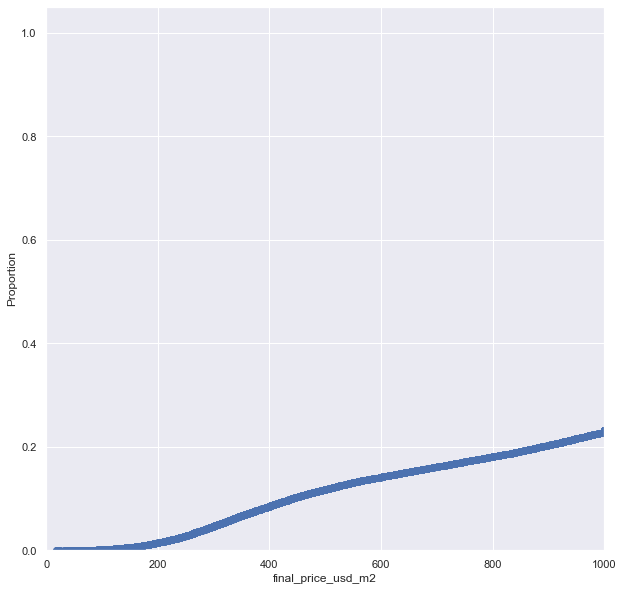

In [263]:
sns.ecdfplot(data11["final_price_usd_m2"], marker="o")
plt.ylim([0,1.05])
plt.xlim([0,1000])

In [197]:
#Realizamos un group by por tipo de Propiedad y Localidad y removimos outliers en aquellas localidades que tengan mas de 20 propiedades por tipo de propiedad
data11["price_usd_m2_sin_outliers"] = data11.groupby(['property_type', "Localidad"])['final_price_usd_m2'].apply(lambda x : calculo_outliers_price_usd_m2(x))

In [257]:
data11["price_usd_m2_sin_outliers_por_prvincia"] = data11.groupby(['property_type', "Provincia"])['final_price_usd_m2'].apply(lambda x : calculo_outliers_price_usd_m2(x))

In [258]:
data11.groupby("property_type")["price_usd_m2_sin_outliers_por_prvincia"].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,3460.0,1335.124760,542.281851,49.49,942.25,1250.00,1642.8725,4717.67
apartment,38666.0,2073.223031,709.274980,226.17,1558.14,2000.00,2504.4700,4422.54
house,20411.0,923.812999,626.064991,17.32,386.30,758.06,1377.5900,3411.18
store,457.0,1909.933545,2899.396510,53.13,876.92,1388.89,2452.8300,57382.08


In [198]:
#En aquellas localidad que haya mas de 20 propiedades se calculan outliers, es decir en aquellas localidades con menos de 20 prop no se remueven outliers
data11.groupby(['property_type', "Localidad"])['final_price_usd_m2'].count()

property_type  Localidad       
PH             Abasto              12
               Almagro             52
               Almirante Brown     23
               Avellaneda          55
               Bahía Blanca         5
                                   ..
store          Villa Luro           1
               Villa Ortuzar        3
               Villa Santa Rita     1
               Villa Urquiza        3
               Villa del Parque     4
Name: final_price_usd_m2, Length: 441, dtype: int64

In [255]:
data11.groupby("property_type")["final_price_usd_m2"].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,3520.0,1437.349210,2919.602482,49.49,947.835,1256.030,1680.0475,166442.95
apartment,39986.0,2356.252151,2210.022726,91.14,1572.000,2021.485,2582.6250,34608.00
house,20635.0,970.417130,1876.796967,17.32,389.065,772.730,1388.8900,157480.31
store,492.0,3112.276911,12781.586760,53.13,928.405,1499.515,2750.3375,269461.08


In [256]:
data11.groupby("property_type")["price_usd_m2_sin_outliers"].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,3520.0,1437.349210,2919.602482,49.49,947.835,1256.030,1680.0475,166442.95
apartment,39986.0,2356.252151,2210.022726,91.14,1572.000,2021.485,2582.6250,34608.00
house,20635.0,970.417130,1876.796967,17.32,389.065,772.730,1388.8900,157480.31
store,492.0,3112.276911,12781.586760,53.13,928.405,1499.515,2750.3375,269461.08


In [199]:
data11.isnull().sum()

property_type                         0
place_name                           21
place_with_parent_names               0
state_name                            0
lat-lon                           25979
price                                 0
currency                              0
price_aprox_local_currency            0
price_aprox_usd                       0
surface_total_in_m2               16487
surface_covered_in_m2              3660
price_usd_per_m2                  16487
price_per_m2                       3662
dormitorios_letras                55394
dormitorios_numeros               45999
numero_ambientes_title_letras     63357
rooms                                 0
description                           0
title                                 0
Provincia                             0
Localidad                             0
covered_imputados                     0
total_imputados                       0
total_imputados_sin_outliers          0
covered_imputados_sin_outliers        0


In [200]:
#Removemos nulos de precio por metro 2
data11.dropna(subset=["price_usd_m2_sin_outliers", "rooms_sin_outliers" ], inplace=True)

In [201]:
#Removimos un total de 3000 outliers aprox
data11.isnull().sum()

property_type                         0
place_name                           18
place_with_parent_names               0
state_name                            0
lat-lon                           24761
price                                 0
currency                              0
price_aprox_local_currency            0
price_aprox_usd                       0
surface_total_in_m2               15400
surface_covered_in_m2              3481
price_usd_per_m2                  15400
price_per_m2                       3483
dormitorios_letras                52683
dormitorios_numeros               44035
numero_ambientes_title_letras     60161
rooms                                 0
description                           0
title                                 0
Provincia                             0
Localidad                             0
covered_imputados                     0
total_imputados                       0
total_imputados_sin_outliers          0
covered_imputados_sin_outliers        0


In [202]:
data11.groupby("property_type")["final_price_usd_m2"].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,3520.0,1437.349210,2919.602482,49.49,947.835,1256.030,1680.0475,166442.95
apartment,39986.0,2356.252151,2210.022726,91.14,1572.000,2021.485,2582.6250,34608.00
house,20635.0,970.417130,1876.796967,17.32,389.065,772.730,1388.8900,157480.31
store,492.0,3112.276911,12781.586760,53.13,928.405,1499.515,2750.3375,269461.08


In [203]:
#Seguimos con maximo y minimo extraños en precio por metro 2
data11.groupby("property_type")["price_usd_m2_sin_outliers"].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,3520.0,1437.349210,2919.602482,49.49,947.835,1256.030,1680.0475,166442.95
apartment,39986.0,2356.252151,2210.022726,91.14,1572.000,2021.485,2582.6250,34608.00
house,20635.0,970.417130,1876.796967,17.32,389.065,772.730,1388.8900,157480.31
store,492.0,3112.276911,12781.586760,53.13,928.405,1499.515,2750.3375,269461.08


In [204]:
#ordenamos "price_usd_m2_sin_outliers" de forma descentente y vemos que los primeros son muy altos, y que la superficie total es llamativa
data11.loc[:,["property_type","price","total_imputados_sin_outliers","covered_imputados_sin_outliers","price_usd_m2_sin_outliers"]].sort_values(by="price_usd_m2_sin_outliers", ascending=False).head(60)

,property_type,price,total_imputados_sin_outliers,covered_imputados_sin_outliers,price_usd_m2_sin_outliers
38931,store,450000.0,1.667740,1.0,269461.08
35298,PH,248000.0,1.485848,1.0,166442.95
45433,house,600000.0,3.811037,1.0,157480.31
42575,house,410000.0,3.811037,1.0,107611.55
42370,house,370000.0,3.811037,1.0,97112.86
64031,house,350000.0,3.811037,1.0,91863.52
8390,house,240000.0,3.811037,1.0,62992.13
14540,house,225000.0,3.811037,1.0,59055.12
44906,store,1434552.0,25.000000,25.0,57382.08
8385,house,215000.0,3.811037,1.0,56430.45


,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,3520.0,1437.349210,2919.602482,49.49,947.835,1256.030,1680.0475,166442.95
apartment,39986.0,2356.252151,2210.022726,91.14,1572.000,2021.485,2582.6250,34608.00
house,20635.0,970.417130,1876.796967,17.32,389.065,772.730,1388.8900,157480.31
store,492.0,3112.276911,12781.586760,53.13,928.405,1499.515,2750.3375,269461.08


In [206]:
#habria que eliminar a mano ciertos precios por m2 que son altos y tambien aquellos muy bajos , ya que no son tantas propiedades
mask_precio_m2_altos = data11["price_usd_m2_sin_outliers"] > 10000
data11[mask_precio_m2_altos]

,property_type,place_name,place_with_parent_names,state_name,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,...,total_imputados_sin_outliers,covered_imputados_sin_outliers,final_price_usd_m2,refaccionado,pileta,amenities,cochera,financiacion,rooms_sin_outliers,price_usd_m2_sin_outliers
8385,house,Villa Santa Rita,Capital Federal|Villa Santa Rita|,Capital Federal,"-34.6188425,-58.4869465",215000.0,USD,3793567.5,215000.0,NaN,...,3.811037,1.0,56430.45,0,0,0,1,0,4.0,56430.45
8390,house,Villa Santa Rita,Capital Federal|Villa Santa Rita|,Capital Federal,"-34.613523,-58.4908717",240000.0,USD,4234680.0,240000.0,NaN,...,3.811037,1.0,62992.13,0,0,0,0,0,4.0,62992.13
9353,store,San Telmo,Capital Federal|San Telmo|,Capital Federal,"-34.623885,-58.371305",1380000.0,USD,24349410.0,1380000.0,NaN,...,33.354802,20.0,41379.31,0,0,0,0,0,3.0,41379.31
9744,PH,La Calera,Córdoba|La Calera|,Córdoba,"-31.3523914,-64.3124577",1250000.0,USD,22055625.0,1250000.0,NaN,...,104.009377,70.0,12018.08,0,0,0,0,0,2.0,12018.08
14540,house,Villa Santa Rita,Capital Federal|Villa Santa Rita|,Capital Federal,"-34.6170688,-58.4840946",225000.0,USD,3970012.5,225000.0,NaN,...,3.811037,1.0,59055.12,0,0,0,0,0,3.0,59055.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96135,store,San Fernando,Bs.As. G.B.A. Zona Norte|San Fernando|,Bs.As. G.B.A. Zona Norte,NaN,1110000.0,USD,19585395.0,1110000.0,80.0,...,80.000000,80.0,13875.00,0,0,0,0,0,2.0,13875.00
116184,store,Floresta,Capital Federal|Floresta|,Capital Federal,"-34.63003,-58.488185",395000.0,USD,6969577.5,395000.0,NaN,...,33.354802,20.0,11844.08,0,0,0,0,0,1.0,11844.08
116344,store,Trujui,Bs.As. G.B.A. Zona Oeste|Moreno|Trujui|,Bs.As. G.B.A. Zona Oeste,"-34.601603,-58.760022",500000.0,USD,8822250.0,500000.0,NaN,...,33.354802,20.0,14992.50,0,0,0,0,0,4.0,14992.50
117181,store,Villa Dominico,Bs.As. G.B.A. Zona Sur|Avellaneda|Villa Dominico|,Bs.As. G.B.A. Zona Sur,"-34.692756,-58.33281",763000.0,USD,13462753.5,763000.0,NaN,...,33.354802,20.0,22878.56,0,0,0,0,0,1.0,22878.56


In [250]:
data11.columns

Index(['property_type', 'place_name', 'place_with_parent_names', 'state_name',
       'lat-lon', 'price', 'currency', 'price_aprox_local_currency',
       'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
       'price_usd_per_m2', 'price_per_m2', 'dormitorios_letras',
       'dormitorios_numeros', 'numero_ambientes_title_letras', 'rooms',
       'description', 'title', 'Provincia', 'Localidad', 'covered_imputados',
       'total_imputados', 'total_imputados_sin_outliers',
       'covered_imputados_sin_outliers', 'final_price_usd_m2', 'refaccionado',
       'pileta', 'amenities', 'cochera', 'financiacion', 'rooms_sin_outliers',
       'price_usd_m2_sin_outliers'],
      dtype='object')

In [207]:
data11.groupby("property_type")["price_usd_m2_sin_outliers"].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,3520.0,1437.349210,2919.602482,49.49,947.835,1256.030,1680.0475,166442.95
apartment,39986.0,2356.252151,2210.022726,91.14,1572.000,2021.485,2582.6250,34608.00
house,20635.0,970.417130,1876.796967,17.32,389.065,772.730,1388.8900,157480.31
store,492.0,3112.276911,12781.586760,53.13,928.405,1499.515,2750.3375,269461.08


In [208]:
#Analizamos precio por metro cuadrado menores a 300
mask_precio_m2_bajos = data11["price_usd_m2_sin_outliers"] < 300
data11[mask_precio_m2_bajos]

,property_type,place_name,place_with_parent_names,state_name,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,...,total_imputados_sin_outliers,covered_imputados_sin_outliers,final_price_usd_m2,refaccionado,pileta,amenities,cochera,financiacion,rooms_sin_outliers,price_usd_m2_sin_outliers
64,house,Rosario,Santa Fe|Rosario|,Santa Fe,"-32.9196695354,-60.7594185772",300000.0,USD,5293350.00,300000.00,1085.0,...,1085.000000,260.000000,276.50,0,0,0,1,0,5.0,276.50
123,house,Luján,Buenos Aires Interior|Luján|,Buenos Aires Interior,"-34.5850814167,-59.1181568709",150000.0,USD,2646675.00,150000.00,534.0,...,534.000000,75.000000,280.90,0,1,0,1,0,4.0,280.90
130,house,Colón,Entre Ríos|Colón|,Entre Ríos,"-32.2155138937,-58.2340149489",1111111.0,ARS,1099520.36,62315.19,328.0,...,328.000000,222.000000,189.99,0,0,0,0,0,4.0,189.99
132,house,Jose Leon Suarez,Bs.As. G.B.A. Zona Norte|General San Martín|Jose Leon Suarez|,Bs.As. G.B.A. Zona Norte,"-34.54517,-58.578136",96000.0,USD,1693872.00,96000.00,NaN,...,381.103750,100.000000,251.90,0,0,0,1,0,3.0,251.90
142,house,Mar del Plata,Buenos Aires Costa Atlántica|Mar del Plata|,Buenos Aires Costa Atlántica,"-37.9610169,-57.6212221",90000.0,USD,1588005.00,90000.00,380.0,...,380.000000,99.710381,236.84,0,0,0,0,0,3.0,236.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120206,house,Balcarce,Buenos Aires Interior|Balcarce|,Buenos Aires Interior,"-37.8375611,-58.2598026",75000.0,USD,1323337.50,75000.00,390.0,...,390.000000,135.000000,192.31,0,0,0,0,0,4.0,192.31
120216,house,Villa Adelina,Bs.As. G.B.A. Zona Norte|San Isidro|Villa Adelina|,Bs.As. G.B.A. Zona Norte,NaN,138000.0,USD,2434941.00,138000.00,NaN,...,529.734212,139.000000,260.51,0,0,0,0,0,5.0,260.51
120304,house,Escobar,Bs.As. G.B.A. Zona Norte|Escobar|,Bs.As. G.B.A. Zona Norte,NaN,135000.0,USD,2382007.50,135000.00,NaN,...,457.324500,120.000000,295.20,0,0,0,0,0,3.0,295.20
120310,house,Punilla,Córdoba|Punilla|,Córdoba,NaN,170000.0,USD,2999565.00,170000.00,NaN,...,609.765999,160.000000,278.79,0,1,0,0,0,5.0,278.79


In [209]:
data11["price_usd_m2_sin_outliers"].max()

269461.08

In [210]:
data11["price_usd_m2_sin_outliers"].min()

17.32

In [211]:
#Analizamos superficie total menores a 50
mask_superficie_total_baja = data11["total_imputados_sin_outliers"] < 30
data11[mask_superficie_total_baja]

,property_type,place_name,place_with_parent_names,state_name,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,...,total_imputados_sin_outliers,covered_imputados_sin_outliers,final_price_usd_m2,refaccionado,pileta,amenities,cochera,financiacion,rooms_sin_outliers,price_usd_m2_sin_outliers
74,apartment,Mar del Plata,Buenos Aires Costa Atlántica|Mar del Plata|,Buenos Aires Costa Atlántica,"-38.0089211,-57.5461427",51000.0,USD,899869.50,51000.00,29.0,...,29.0,29.0,1758.62,0,0,0,0,0,1.0,1758.62
82,apartment,Mar del Plata,Buenos Aires Costa Atlántica|Mar del Plata|,Buenos Aires Costa Atlántica,"-37.9857857,-57.5827117",54900.0,USD,968683.05,54900.00,28.0,...,28.0,28.0,1960.71,0,0,0,0,0,1.0,1960.71
170,apartment,Mar del Plata,Buenos Aires Costa Atlántica|Mar del Plata|,Buenos Aires Costa Atlántica,"-38.0053306,-57.5510655",55900.0,USD,986327.55,55900.00,29.0,...,29.0,29.0,1927.59,0,0,0,0,0,1.0,1927.59
351,apartment,Paternal,Capital Federal|Paternal|,Capital Federal,"-34.6035937,-58.4654251",1099350.0,ARS,1087882.05,61655.59,27.0,...,27.0,27.0,2283.54,0,0,0,0,0,1.0,2283.54
352,apartment,Paternal,Capital Federal|Paternal|,Capital Federal,"-34.6035937,-58.4654251",1113420.0,ARS,1101805.15,62444.68,27.0,...,27.0,27.0,2312.77,0,0,0,0,0,1.0,2312.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120204,apartment,Mar del Plata,Buenos Aires Costa Atlántica|Mar del Plata|,Buenos Aires Costa Atlántica,"-37.996638,-57.550819",45000.0,USD,794002.50,45000.00,27.0,...,27.0,27.0,1666.67,0,0,0,0,0,1.0,1666.67
120226,apartment,Ramos Mejía,Bs.As. G.B.A. Zona Oeste|La Matanza|Ramos Mejía|,Bs.As. G.B.A. Zona Oeste,NaN,50000.0,USD,882225.00,50000.00,26.0,...,26.0,26.0,1923.08,0,0,0,0,0,1.0,1923.08
120956,apartment,Rosario,Santa Fe|Rosario|,Santa Fe,NaN,820000.0,ARS,811446.02,45988.61,25.0,...,25.0,25.0,1839.54,0,0,0,0,0,2.0,1839.54
121109,apartment,Rosario,Santa Fe|Rosario|,Santa Fe,NaN,840000.0,ARS,831237.33,47110.28,27.0,...,27.0,25.0,1744.83,0,0,0,1,0,1.0,1744.83


In [212]:
data11.shape

(64633, 33)

In [213]:
data11.columns

Index(['property_type', 'place_name', 'place_with_parent_names', 'state_name',
       'lat-lon', 'price', 'currency', 'price_aprox_local_currency',
       'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
       'price_usd_per_m2', 'price_per_m2', 'dormitorios_letras',
       'dormitorios_numeros', 'numero_ambientes_title_letras', 'rooms',
       'description', 'title', 'Provincia', 'Localidad', 'covered_imputados',
       'total_imputados', 'total_imputados_sin_outliers',
       'covered_imputados_sin_outliers', 'final_price_usd_m2', 'refaccionado',
       'pileta', 'amenities', 'cochera', 'financiacion', 'rooms_sin_outliers',
       'price_usd_m2_sin_outliers'],
      dtype='object')

In [214]:
data11.groupby("property_type")["covered_imputados_sin_outliers"].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,3520.0,78.649994,33.730433,1.0,54.00,72.0,100.0,187.0
apartment,39986.0,53.714140,22.179644,1.0,37.00,48.0,67.0,131.0
house,20635.0,180.097141,90.164304,1.0,113.00,170.0,234.0,470.0
store,492.0,167.807472,134.018016,1.0,51.75,144.0,250.0,582.0


## Para graficar limpiamos los outliers 

In [215]:
data11["rooms"] = data11["rooms"].astype(float)

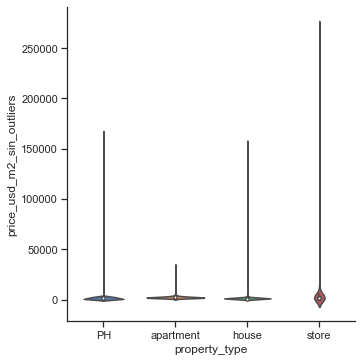

In [216]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x = "property_type", y = "price_usd_m2_sin_outliers", data=data11, kind="violin")
    g.set_axis_labels("property_type", "price_usd_m2_sin_outliers");

<p style="color:#FF0000";> En este gráfico se nota cómo la NO agrupación por tipo de propiedad al momento de limpiar outliers hace que siga habiendo ruido en las variables

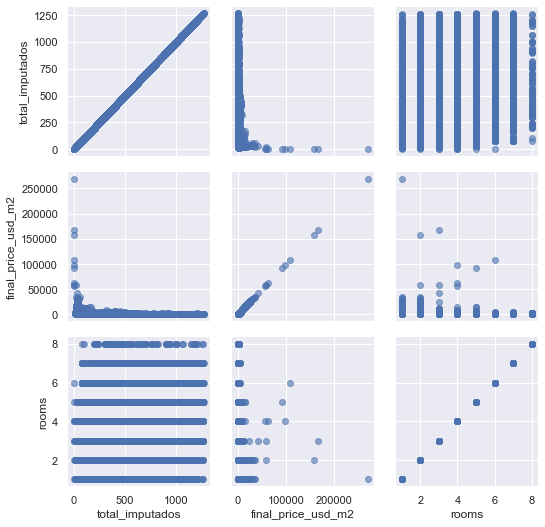

In [217]:
surface_price_graph = sns.PairGrid(data11, vars = ['total_imputados', 'final_price_usd_m2', 'rooms'], palette = 'pastel')
surface_price_graph.map(plt.scatter, alpha = 0.6 )

In [219]:
#sns.histplot(data12['price_usd_m2_sin_outliers'], color = "blue", bins = 150)

<p style="color:#FF0000";> Estimados, creo atacaron todos los objetivos planteado por el desafio pero sería bueno pegarle una revisión al trabajo de cara a la confección del modelo en el Desafio 2. Hay 2 o 3 comentarios que les hice que pueden ser claves para hallanar el camino al momento de predecir la variable target.

<p style="color:#FF0000";> Creo que faltó un poco de trabajo análitico en la parte de visualización pero estoy seguro que fue por cuestiones de tiempo más que por cuestiones técnicas o falta de ideas,  lo que es super entendible!

<p style="color:#FF0000";> Me gustó que se animaran a usar Markdowns para comentar la notebook, ayuda mucho al lector (y a ustedes mismos) a saber qué se está haciendo. Creo que por momento hubo un exceso de comentario, tal vez con comentar ideas generales de lo que se va a hacer en los siguientes 3 o 4 bloques alcanza. No es necesario relatar todas las líneas lo que se está haciendo, sino más bien guiar al lector en términos más generales

<h3 style="color:#FF0000";>  Felicitaciones por la entrega del primer desafio, a seguir !

In [ ]:
#¿Cómo mejorar un modelo lineal?
#Las perillas en un modelo lineal no son muchas ya que no tenemos hiperparametros, lo que se puede hacer es:
#1)	Incluir data al modelo
#2)	Pre procesar la data mejor, limpiarla mejor, eliminando outliers por ejemplo.
#3)	Generar nuevas variables.
#4)	Proponer interacciones entre variables

In [220]:
data12 = data11

In [221]:
data12.columns

Index(['property_type', 'place_name', 'place_with_parent_names', 'state_name',
       'lat-lon', 'price', 'currency', 'price_aprox_local_currency',
       'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
       'price_usd_per_m2', 'price_per_m2', 'dormitorios_letras',
       'dormitorios_numeros', 'numero_ambientes_title_letras', 'rooms',
       'description', 'title', 'Provincia', 'Localidad', 'covered_imputados',
       'total_imputados', 'total_imputados_sin_outliers',
       'covered_imputados_sin_outliers', 'final_price_usd_m2', 'refaccionado',
       'pileta', 'amenities', 'cochera', 'financiacion', 'rooms_sin_outliers',
       'price_usd_m2_sin_outliers'],
      dtype='object')

In [222]:
data12.isnull().sum()

property_type                         0
place_name                           18
place_with_parent_names               0
state_name                            0
lat-lon                           24761
price                                 0
currency                              0
price_aprox_local_currency            0
price_aprox_usd                       0
surface_total_in_m2               15400
surface_covered_in_m2              3481
price_usd_per_m2                  15400
price_per_m2                       3483
dormitorios_letras                52683
dormitorios_numeros               44035
numero_ambientes_title_letras     60161
rooms                                 0
description                           0
title                                 0
Provincia                             0
Localidad                             0
covered_imputados                     0
total_imputados                       0
total_imputados_sin_outliers          0
covered_imputados_sin_outliers        0


In [223]:
#Nos quedamos con aquellas features que vamos a utilizar en el modelo
data13 = data12.loc[:,["property_type","Provincia","Localidad","price_usd_m2_sin_outliers","rooms_sin_outliers","covered_imputados_sin_outliers","total_imputados_sin_outliers","refaccionado","pileta", "amenities"]]

In [224]:
data13.rename(columns={"covered_imputados_sin_outliers":"superficie_cubierta", "total_imputados_sin_outliers":"superficie_total","price_usd_m2_sin_outliers":"price_usd_m2","rooms_sin_outliers":\
              "ambientes"}, inplace=True)

In [225]:
data13.head()

,property_type,Provincia,Localidad,price_usd_m2,ambientes,superficie_cubierta,superficie_total,refaccionado,pileta,amenities
0,PH,Capital Federal,Mataderos,1127.27,2.0,40.0,55.0,1,0,0
2,apartment,Capital Federal,Mataderos,1309.09,2.0,55.0,55.0,0,0,0
4,apartment,Buenos Aires Costa Atlántica,Mar del Plata,1828.57,2.0,35.0,35.0,0,0,0
7,apartment,Capital Federal,Belgrano,3066.67,1.0,40.0,45.0,0,1,0
8,apartment,Capital Federal,Belgrano,3000.00,2.0,60.0,65.0,0,1,0


In [226]:
data13.isnull().sum()

property_type          0
Provincia              0
Localidad              0
price_usd_m2           0
ambientes              0
superficie_cubierta    0
superficie_total       0
refaccionado           0
pileta                 0
amenities              0
dtype: int64

In [227]:
data13.dtypes

property_type           object
Provincia               object
Localidad               object
price_usd_m2           float64
ambientes              float64
superficie_cubierta    float64
superficie_total       float64
refaccionado             int64
pileta                   int64
amenities                int64
dtype: object

### Analizamos la correlacion de las variables

In [228]:
#realizmaos una matriz de correlaciones
features = ["price_usd_m2","superficie_cubierta","superficie_total", "ambientes", "refaccionado", "pileta", "amenities"]
data13[features].corr()

,price_usd_m2,superficie_cubierta,superficie_total,ambientes,refaccionado,pileta,amenities
price_usd_m2,1.000000,-0.193375,-0.250462,-0.184775,-0.025145,0.020714,0.101859
superficie_cubierta,-0.193375,1.000000,0.733461,0.551524,0.035240,0.293883,-0.157169
superficie_total,-0.250462,0.733461,1.000000,0.481855,0.031344,0.234507,-0.150267
ambientes,-0.184775,0.551524,0.481855,1.000000,0.051561,0.092725,-0.148048
refaccionado,-0.025145,0.035240,0.031344,0.051561,1.000000,-0.035053,-0.039071
pileta,0.020714,0.293883,0.234507,0.092725,-0.035053,1.000000,0.320357
amenities,0.101859,-0.157169,-0.150267,-0.148048,-0.039071,0.320357,1.000000


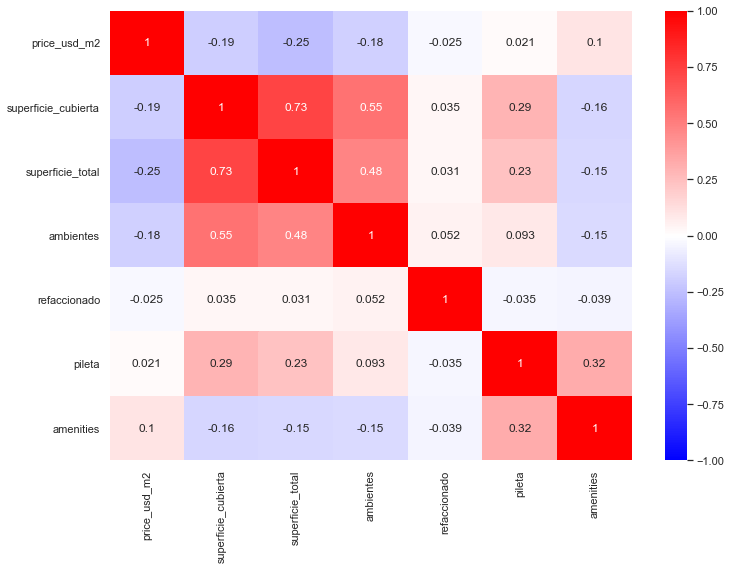

In [229]:
#Visualizamos la matriz de correlacion en Seaborn usando un heatmap
sns.heatmap(data13[features].corr(), vmin=-1, vmax=1, center=0, cmap="bwr", annot=True);

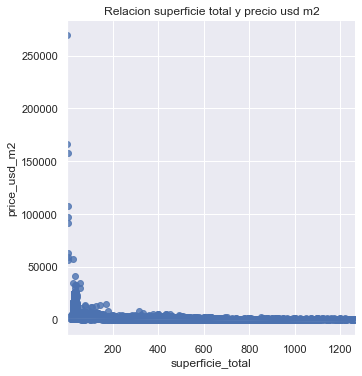

In [230]:
plt.rcParams['figure.figsize']=(10,10)
sns.lmplot(x="superficie_total", y="price_usd_m2", data=data13)
plt.title("Relacion superficie total y precio usd m2")
plt.show()

### Utilizamos el VIF para medir la multicolinealidad entre variables

In [231]:
#Analizamos el VIF (variance inflation factor)
#si el VIF > 10 puede llegar a hacer ruido la varible
#si el VIF > 30 se recomienda sacar la variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(data13[features].values,i) for i in range(data13[features].shape[1])]
vif = pd.DataFrame({"vif":vif}, index=features)
vif.sort_values(by="vif", ascending=False)

,vif
superficie_cubierta,6.216563
ambientes,4.097512
superficie_total,3.667581
pileta,1.820251
price_usd_m2,1.416026
amenities,1.310329
refaccionado,1.021894


In [232]:
data13.head()

,property_type,Provincia,Localidad,price_usd_m2,ambientes,superficie_cubierta,superficie_total,refaccionado,pileta,amenities
0,PH,Capital Federal,Mataderos,1127.27,2.0,40.0,55.0,1,0,0
2,apartment,Capital Federal,Mataderos,1309.09,2.0,55.0,55.0,0,0,0
4,apartment,Buenos Aires Costa Atlántica,Mar del Plata,1828.57,2.0,35.0,35.0,0,0,0
7,apartment,Capital Federal,Belgrano,3066.67,1.0,40.0,45.0,0,1,0
8,apartment,Capital Federal,Belgrano,3000.00,2.0,60.0,65.0,0,1,0


### Separamos entre variables numericas y categoricas

In [233]:
#Nos quedamos con aquellas variables numericas
variables_numericas = ["ambientes","superficie_cubierta","superficie_total","refaccionado", "pileta","amenities"]
numericas = data13[variables_numericas]

#Nos quedamos con aquellas variables categoricas 
variables_categoricas = ["property_type", "Provincia","Localidad"]

In [234]:
#Metodo "Get_dummies" de pandas
dummies = pd.get_dummies(data13[variables_categoricas], drop_first=True) 
dummies

,property_type_apartment,property_type_house,property_type_store,Provincia_Bs.As. G.B.A. Zona Oeste,Provincia_Bs.As. G.B.A. Zona Sur,Provincia_Buenos Aires Costa Atlántica,Provincia_Buenos Aires Interior,Provincia_Capital Federal,Provincia_Chubut,Provincia_Corrientes,...,Localidad_Villa General Belgrano,Localidad_Villa Gesell,Localidad_Villa Lugano,Localidad_Villa Luro,Localidad_Villa Ortuzar,Localidad_Villa Pueyrredón,Localidad_Villa Santa Rita,Localidad_Villa Urquiza,Localidad_Villa del Parque,Localidad_Yerba Buena
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121158,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
121160,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
121216,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121217,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [235]:
#Creamos el metodo "one hot encoding" de sklearn
from sklearn.preprocessing import OneHotEncoder 
onehot_encoder = OneHotEncoder(drop='first')
# fiteamos y transformamos las columnas 
oneHot_correct = onehot_encoder.fit_transform(data13[variables_categoricas])
# pongo el vector en un dataset.
dummy_oneHot_correct = pd.DataFrame(oneHot_correct.toarray())
dummy_oneHot_correct

,0,1,2,3,4,5,6,7,8,9,...,143,144,145,146,147,148,149,150,151,152
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64628,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64629,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64630,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64631,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [236]:
col_names = [variables_categoricas[i] + '_' + onehot_encoder.categories_[i] for i in range(len(variables_categoricas)) ]
col_names

[array(['property_type_PH', 'property_type_apartment',
        'property_type_house', 'property_type_store'], dtype=object),
 array(['Provincia_Bs.As. G.B.A. Zona Norte',
        'Provincia_Bs.As. G.B.A. Zona Oeste',
        'Provincia_Bs.As. G.B.A. Zona Sur',
        'Provincia_Buenos Aires Costa Atlántica',
        'Provincia_Buenos Aires Interior', 'Provincia_Capital Federal',
        'Provincia_Chubut', 'Provincia_Corrientes', 'Provincia_Córdoba',
        'Provincia_Entre Ríos', 'Provincia_La Pampa', 'Provincia_Mendoza',
        'Provincia_Misiones', 'Provincia_Neuquén', 'Provincia_Río Negro',
        'Provincia_San Luis', 'Provincia_Santa Fe', 'Provincia_Tucumán'],
       dtype=object),
 array(['Localidad_Abasto', 'Localidad_Almagro',
        'Localidad_Almirante Brown', 'Localidad_Avellaneda',
        'Localidad_Bahía Blanca', 'Localidad_Balcarce',
        'Localidad_Balvanera', 'Localidad_Barracas',
        'Localidad_Barrio Norte', 'Localidad_Belgrano',
        'Localidad_Beraz

In [237]:
col_names_drop_first = [sublist[i] for sublist in col_names for i in range(len(sublist)) if i != 0]
col_names_drop_first

['property_type_apartment',
 'property_type_house',
 'property_type_store',
 'Provincia_Bs.As. G.B.A. Zona Oeste',
 'Provincia_Bs.As. G.B.A. Zona Sur',
 'Provincia_Buenos Aires Costa Atlántica',
 'Provincia_Buenos Aires Interior',
 'Provincia_Capital Federal',
 'Provincia_Chubut',
 'Provincia_Corrientes',
 'Provincia_Córdoba',
 'Provincia_Entre Ríos',
 'Provincia_La Pampa',
 'Provincia_Mendoza',
 'Provincia_Misiones',
 'Provincia_Neuquén',
 'Provincia_Río Negro',
 'Provincia_San Luis',
 'Provincia_Santa Fe',
 'Provincia_Tucumán',
 'Localidad_Almagro',
 'Localidad_Almirante Brown',
 'Localidad_Avellaneda',
 'Localidad_Bahía Blanca',
 'Localidad_Balcarce',
 'Localidad_Balvanera',
 'Localidad_Barracas',
 'Localidad_Barrio Norte',
 'Localidad_Belgrano',
 'Localidad_Berazategui',
 'Localidad_Boca',
 'Localidad_Boedo',
 'Localidad_Caballito',
 'Localidad_Cariló',
 'Localidad_Castellanos',
 'Localidad_Centro / Microcentro',
 'Localidad_Chacarita',
 'Localidad_Chascomús',
 'Localidad_Coghlan',

In [238]:
#A cada dummy le asignamos un nombre
dummy_oneHot_correct.columns = col_names_drop_first
dummy_oneHot_correct

,property_type_apartment,property_type_house,property_type_store,Provincia_Bs.As. G.B.A. Zona Oeste,Provincia_Bs.As. G.B.A. Zona Sur,Provincia_Buenos Aires Costa Atlántica,Provincia_Buenos Aires Interior,Provincia_Capital Federal,Provincia_Chubut,Provincia_Corrientes,...,Localidad_Villa General Belgrano,Localidad_Villa Gesell,Localidad_Villa Lugano,Localidad_Villa Luro,Localidad_Villa Ortuzar,Localidad_Villa Pueyrredón,Localidad_Villa Santa Rita,Localidad_Villa Urquiza,Localidad_Villa del Parque,Localidad_Yerba Buena
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64628,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64629,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64630,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64631,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Creamos la variable X de "Features" y la variable Y "Target" para luego separar los datos de Training y Testeo

In [239]:
#Para la variable x concatenamos las variables numericas y las dummies creadas 
X = pd.concat([numericas, dummies], axis=1)
#Para la variable y dejamos unicamente la variable objetivo
Y = data13["price_usd_m2"]

In [240]:
#separamos los datos de entrenamiento y testeo
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 10)

### Empezamos a armar el modelo de Stats Model

In [241]:
#Creamos el modelo utilizando Stats Model
import statsmodels.api as sm

#instanciamos la constante tanto para entrenamiento como para testeo.
X_train_sm = sm.add_constant(x_train)
X_test_sm = sm.add_constant(x_test)

#instanciamos el modelo SIN regularizacion
modelo_sin_regularizacion = sm.OLS(y_train, X_train_sm).fit()

#calculamos las predicciones sin regularizacion
prediccones_sin_regularizacion = modelo_sin_regularizacion.predict(X_test_sm)

In [242]:
#probamos ciertas metricas
from statsmodels.tools import eval_measures
from sklearn import metrics
print("RMSE :", eval_measures.rmse(y_test, prediccones_sin_regularizacion))
print("MAE :", eval_measures.meanabs(y_test, prediccones_sin_regularizacion))
print("R2 :", metrics.r2_score(y_test, prediccones_sin_regularizacion))

RMSE : 1887.4055594068698
MAE : 587.4404679333188
R2 : 0.3017288841748341


In [243]:
modelo_sin_regularizacion.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           price_usd_m2   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     134.9
Date:                Thu, 24 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:13:50   Log-Likelihood:            -4.4134e+05
No. Observations:               48474   AIC:                         8.830e+05
Df Residuals:                   48327   BIC:                         8.843e+05
Df Model:                         146                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                   1370.9831   1261.901      1.086      0.277   -1102.360    3844.326
ambientes                                -11.3486      9.680     -1.172      0.241     -30.321       7.624
superficie_cubierta                        0.7873      0.218      3.604      0.000       0.359       1.216
superficie_total                          -1.8584      0.071    -26.279      0.000      -1.997      -1.720
refaccionado                            -248.2680     76.608     -3.241      0.001    -398.422     -98.114
pileta                                   146.4806     26.619      5.503      0.000      94.306     198.655
amenities                                190.6962     37.861      5.037      0.000     116.488     264.905
property_type_apartment                  559.6635     46.792     11.961      0.000     467.950     651.377
property_type_house                      148.5029     52.542      2.826      0.005      45.521     251.485
property_type_store                     1921.5568    122.908     15.634      0.000    1680.656    2162.457
Provincia_Bs.As. G.B.A. Zona Oeste       250.5867    973.213      0.257      0.797   -1656.924    2158.098
Provincia_Bs.As. G.B.A. Zona Sur         -37.1327   3102.099     -0.012      0.990   -6117.288    6043.022
Provincia_Buenos Aires Costa Atlántica   -70.4994   1159.654     -0.061      0.952   -2343.436    2202.437
Provincia_Buenos Aires Interior         -281.9714   1151.385     -0.245      0.807   -2538.701    1974.758
Provincia_Capital Federal                124.3733   1286.986      0.097      0.923   -2398.136    2646.883
Provincia_Chubut                         -86.4551    651.385     -0.133      0.894   -1363.178    1190.268
Provincia_Corrientes                     359.1429    982.999      0.365      0.715   -1567.549    2285.834
Provincia_Córdoba                       -497.4125   2185.091     -0.228      0.820   -4780.219    3785.394
Provincia_Entre Ríos                     590.7512   2490.320      0.237      0.812   -4290.308    5471.810
Provincia_La Pampa                      -242.7323    750.738     -0.323      0.746   -1714.188    1228.723
Provincia_Mendoza                        185.7999   3097.994      0.060      0.952   -5886.310    6257.909
Provincia_Misiones                      -265.1325    638.146     -0.415      0.678   -1515.907     985.642
Provincia_Neuquén                        160.7745    977.289      0.165      0.869   -1754.725    2076.274
Provincia_Río Negro                     -147.0390    854.619     -0.172      0.863   -1822.103    1528.025
Provincia_San Luis                       434.0441   1034.339      0.420      0.675   -1593.274    2461.362
Provincia_Santa Fe                      -481.5557   1155.913     -0.417      0.677   -2

In [244]:
#Hacemos Cross Validation para sacar lambda
from sklearn import linear_model
lasso_cv = linear_model.LassoCV(normalize = True, cv = 5)
                                        
cross_validation = lasso_cv.fit(x_train, y_train)

In [245]:
best_alpha = cross_validation.alpha_
best_alpha

0.024615365080032873

In [246]:
#regularizamos el modelo con una regresion Lasso , PROBE con L1_wt = 0 (que es una regularizacion Ridge y el R2 me da negativo)
modelo_con_regularizacion = sm.OLS(y_train, X_train_sm)
modelo_regularizado = modelo_con_regularizacion.fit_regularized(alpha = best_alpha, L1_wt = 1)
modelo_regularizado

In [247]:
#predecimos con el nuevo modelo regularizado
prediccones_con_regularizacion = modelo_regularizado.predict(X_test_sm)

#probamos ciertas metricas 
print("RMSE: ", eval_measures.rmse(y_test,prediccones_con_regularizacion))
print("MAE: ", eval_measures.meanabs(y_test,prediccones_con_regularizacion))
print("R2: ", metrics.r2_score(y_test, prediccones_con_regularizacion))


RMSE:  1886.8307264984862
MAE:  587.5820064147297
R2:  0.3021541537628176


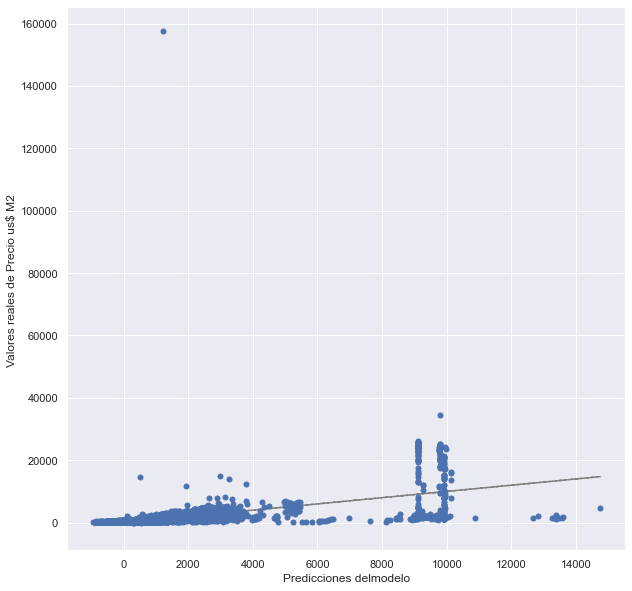

In [248]:
#graficamos las predicciones y los datos reales

# X = df[["RM", "LSTAT"]]
# y = targets["MEDV"]

# Fiteo el modelo y hago las predicciones.
# model = lm.fit(X, y)
# predictions = model.predict(X)

# Graficamos el modelo
plt.plot(prediccones_con_regularizacion, prediccones_con_regularizacion, '-.',c='grey')
plt.scatter(prediccones_con_regularizacion, y_test, s=25, c='b', marker='o', zorder=100)
plt.xlabel("Predicciones delmodelo")
plt.ylabel("Valores reales de Precio us$ M2 ")
plt.show()

In [249]:
# sns.regplot(data = df_pa_graficar, x="LSTAT", y="MEDV", order=1, ci=None, scatter_kws={'color':'r', 's':9})
# plt.xlim(0,)
# plt.ylim(bottom=0);

### Modelo Sk Learn